<a href="https://www.kaggle.com/code/thirumani/shark-tank-australia-data-analysis?scriptVersionId=247783961" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## <p style="background-color:lightblue;color:white;font-size:24px;text-align:center;border-radius:10px 10px;font-weight:bold;border:2px solid #800080;">🇦🇺 SharkTank Australia Exploratory Data Analysis (EDA) 🦈</p>
## Dataset https://www.kaggle.com/datasets/thirumani/shark-tank-australia-dataset

In [1]:
from IPython.display import IFrame
import datetime
print("Notebook was last executed on:", datetime.date.today().strftime("%Y-%b-%d"), "with Python version")
!python --version

Notebook was last executed on: 2025-Jun-28 with Python version
Python 3.11.11


In [2]:
# Source: Wikipedia
IFrame('https://upload.wikimedia.org/wikipedia/en/5/50/Shark_Tank_Australia_logo.png', width=310, height=175)

## ⚒️ Importing Required Python Libraries

In [3]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 50)

import matplotlib.pyplot as plt
import seaborn as sns
from babel.numbers import format_currency
from wordcloud import WordCloud, STOPWORDS
import geopandas as gpd
import plotly.express as px
import plotly.io as pio
pio.templates.default = "plotly_dark"
pio.renderers.default = 'notebook'

## ⏳ Check and import dataset

In [4]:
! ls -l /kaggle/input/shark-tank-australia-dataset/
shark_tank = pd.read_csv('/kaggle/input/shark-tank-australia-dataset/Shark Tank Australia dataset.csv')

nRow, nCol = shark_tank.shape
print(f'\nThere are {nRow} rows and {nCol} columns in the dataset')

total 76
-rw-r--r-- 1 nobody nogroup 75685 Jun 28 05:10 'Shark Tank Australia dataset.csv'

There are 279 rows and 52 columns in the dataset


## 💵 Exploratory Data Analysis (EDA)

In [5]:
shark_tank.head(5)

Season Number   Startup Name  Episode Number  Pitch Number Season Start  \
0              1  CricketCooler               1             1     8-Feb-15   
1              1     RentResumé               1             2     8-Feb-15   
2              1     CASEBOARDS               1             3     8-Feb-15   
3              1         Hamdog               1             4     8-Feb-15   
4              1  EdibleBugShop               2             5     8-Feb-15   

  Season End Original Air Date                 Industry  \
0   7-Jun-15          8-Feb-15  Fitness/Sports/Outdoors   
1   7-Jun-15          8-Feb-15            Software/Tech   
2   7-Jun-15          8-Feb-15  Fitness/Sports/Outdoors   
3   7-Jun-15          8-Feb-15        Food and Beverage   
4   7-Jun-15         15-Feb-15        Business Services   

                                Business Description  \
0               An esky with attached cricket stumps   
1  Online rental subscription that details rental...   
2  Portable, electric remote controlled skateboar...   
3                  Hamburger and hot dog combination   
4  CircleHarvest Edible insect business selling g...   

                        Company Website Pitchers Gender Pitchers Average Age  \
0     https://www.cricketcooler.com.au/            Male               Middle   
1               https://rentresume.com/            Male               Middle   
2  https://epicelectricskateboards.com/            Male               Middle   
3                                   NaN            Male               Middle   
4         https://ediblebugshop.com.au/          Female               Middle   

  Pitchers City Pitchers State           Entrepreneur Names  \
0      Adelaide             SA  Adam Dubrich & Leigh Warren   
1     Melbourne            VIC                 Darren Smith   
2    Gold Coast            QLD                   Adam Riley   
3         Perth             WA                  Mark Murray   
4        Sydney            NSW               Skye Blackburn   

   Multiple Entrepreneurs  Viewers  Original Ask Amount  \
0                     1.0  616,000             280000.0   
1                     0.0  616,000            2500000.0   
2                     0.0  616,000              20000.0   
3                     0.0  616,000                  1.0   
4                     0.0  688,000             170000.0   

   Original Offered Equity  Valuation Requested  Received Offer  \
0                     20.0            1400000.0               1   
1                     40.0            6250000.0               0   
2                     10.0             200000.0               1   
3                     25.0                  4.0               1   
4                     20.0             850000.0               1   

   Accepted Offer  Total Deal Amount  Total Deal Equity  Deal Valuation  ...  \
0             1.0           280000.0               20.0       1400000.0  ...   
1             NaN                NaN                NaN             NaN  ...   
2             1.0            40000.0               35.0        114286.0  ...   
3             1.0                2.0               50.0             4.0  ...   
4             1.0           170000.0               50.0        340000.0  ...   

   Equity Per Shark  Royalty Deal  Advisory Shares Equity      Loan  \
0              20.0           NaN                     NaN  200000.0   
1               NaN           NaN                     NaN       NaN   
2              17.5           NaN                     NaN       NaN   
3              50.0           NaN                     NaN       NaN   
4              50.0           NaN                     NaN       NaN   

   Deal Has Conditions  Mentorship Steve Investment Amount  \
0                  NaN         NaN                     NaN   
1                  NaN         NaN                     NaN   
2                  NaN         NaN                     NaN   
3                  NaN         NaN                     NaN   
4     

In [6]:
shark_tank.tail(10).T

269  \
Season Number                                         6   
Startup Name                              BurleighWagon   
Episode Number                                        7   
Pitch Number                                        270   
Season Start                                  16-Oct-24   
Season End                                    11-Dec-24   
Original Air Date                             27-Nov-24   
Industry                        Fitness/Sports/Outdoors   
Business Description                     beach vehicles   
Company Website              https://burleighwagon.com/   
Pitchers Gender                                     NaN   
Pitchers Average Age                                NaN   
Pitchers City                                   Bundall   
Pitchers State                                      QLD   
Entrepreneur Names                                  NaN   
Multiple Entrepreneurs                              NaN   
Viewers                                             NaN   
Original Ask Amount                            450000.0   
Original Offered Equity                            10.0   
Valuation Requested                           4500000.0   
Received Offer                                        1   
Accepted Offer                                      1.0   
Total Deal Amount                              450000.0   
Total Deal Equity                                  25.0   
Deal Valuation                                1800000.0   
Number of Sharks in Deal                            1.0   
Investment Amount Per Shark                    450000.0   
Equity Per Shark                                   25.0   
Royalty Deal                                        1.0   
Advisory Shares Equity                              NaN   
Loan                                                NaN   
Deal Has Conditions                                 NaN   
Mentorship                                          NaN   
Steve Investment Amount                             NaN   
Steve Investment Equity                             NaN   
Janine Investment Amount                            NaN   
Janine Investment Equity                            NaN   
Andrew Investment Amount                            NaN   
Andrew Investment Equity                            NaN   
Naomi Investment Amount                             NaN   
Naomi Investment Equity                             NaN   
Glen Investment Amount                              NaN   
Glen Investment Equity                              NaN   
Guest Investment Amount                        450000.0   
Guest Investment Equity                            25.0   
Invested Guest Name                       Davie Fogarty   
Steve Present                                       NaN   
Janine Present                                      NaN   
Andrew Present                                      NaN   
Naomi Present                                       NaN   
Glen Present                                        NaN   
Guest Present                                       5.0   

                                                       270  \
Season Number                                            6   
Startup Name                                    Strapsicle   
Episode Number                                           7   
Pitch Number                                           271   
Season Start                                     16-Oct-24   
Season End                                       11-Dec-24   
Original Air Date                                27-Nov-24   
Industry                                    Lifestyle/Home   
Business Description                    Kindle accessories   
Company Website                                        NaN   
Pitchers Gender                                     Couple   
Pitchers Average Age                                Middle   
Pitchers City                                          NaN   
Pitchers State                                         N

In [7]:
shark_tank['Season Number'] = shark_tank['Season Number'].astype(pd.Int32Dtype())
shark_tank['Episode Number'] = shark_tank['Episode Number'].astype(pd.Int32Dtype())
shark_tank['Pitch Number'] = shark_tank['Pitch Number'].astype(pd.Int32Dtype())

shark_tank['Startup Name'] = shark_tank['Startup Name'].astype(str)
shark_tank['Industry'] = shark_tank['Industry'].astype(str)
shark_tank['Business Description'] = shark_tank['Business Description'].astype(str)

shark_tank['Multiple Entrepreneurs'] = shark_tank['Multiple Entrepreneurs'].astype(pd.Int32Dtype())

shark_tank['Viewers'] = shark_tank['Viewers'].str.replace(',','')
shark_tank['Viewers'] = pd.to_numeric(shark_tank['Viewers'])

shark_tank['Received Offer'] = shark_tank['Received Offer'].astype(pd.Int32Dtype())
shark_tank['Accepted Offer'] = shark_tank['Accepted Offer'].astype(pd.Int32Dtype())

In [8]:
shark_tank.sample(10).style.set_properties(**{"background-color": "#2a9d8f","color":"white","border": "1px solid black", 'font-size': '10pt'})

In [9]:
shark_tank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279 entries, 0 to 278
Data columns (total 52 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Season Number                279 non-null    Int32  
 1   Startup Name                 279 non-null    object 
 2   Episode Number               279 non-null    Int32  
 3   Pitch Number                 279 non-null    Int32  
 4   Season Start                 279 non-null    object 
 5   Season End                   279 non-null    object 
 6   Original Air Date            279 non-null    object 
 7   Industry                     279 non-null    object 
 8   Business Description         279 non-null    object 
 9   Company Website              231 non-null    object 
 10  Pitchers Gender              275 non-null    object 
 11  Pitchers Average Age         275 non-null    object 
 12  Pitchers City                233 non-null    object 
 13  Pitchers State      

In [10]:
shark_tank.describe().T.round(2).style.background_gradient(cmap = 'Oranges')

In [11]:
# Unique values in each column
for col in shark_tank.columns:
    print("Number of unique values in", col, "-", shark_tank[col].nunique())

Number of unique values in Season Number - 6
Number of unique values in Startup Name - 279
Number of unique values in Episode Number - 15
Number of unique values in Pitch Number - 279
Number of unique values in Season Start - 6
Number of unique values in Season End - 6
Number of unique values in Original Air Date - 70
Number of unique values in Industry - 16
Number of unique values in Business Description - 279
Number of unique values in Company Website - 231
Number of unique values in Pitchers Gender - 4
Number of unique values in Pitchers Average Age - 3
Number of unique values in Pitchers City - 88
Number of unique values in Pitchers State - 6
Number of unique values in Entrepreneur Names - 277
Number of unique values in Multiple Entrepreneurs - 2
Number of unique values in Viewers - 60
Number of unique values in Original Ask Amount - 66
Number of unique values in Original Offered Equity - 36
Number of unique values in Valuation Requested - 98
Number of unique values in Received Off

In [12]:
# Latest/current season data
shark_tank_recent = shark_tank.loc[(shark_tank['Season Number']==6)]

In [13]:
# Data set information
print(shark_tank['Season Number'].max(), "total seasons in Australia SharkTank\n")
print(shark_tank['Pitch Number'].max(), "#startups came for pitching \n")

6 total seasons in Australia SharkTank

279 #startups came for pitching 



Season Number    1   2   3   4  5  6
Episode Number  15  13  13  13  8  8


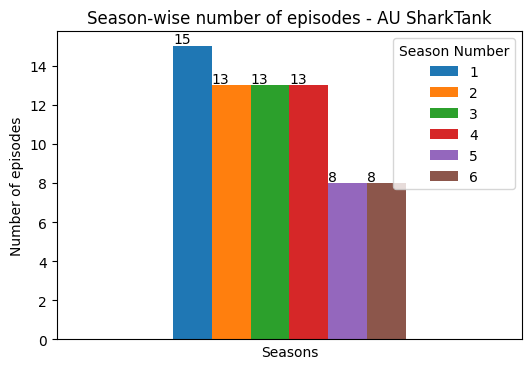

In [14]:
# Season-wise number of episodes
tmp = pd.pivot_table(shark_tank, values='Episode Number', columns='Season Number', aggfunc='max')
print(tmp)
ax = tmp.plot.bar(figsize=(6,4), title="Season-wise number of episodes - AU SharkTank")
plt.xlabel("Seasons")
plt.ylabel("Number of episodes")
plt.xticks([])
for t in ax.patches:
    if (np.isnan(float(t.get_height()))):
        ax.annotate(0, (t.get_x(), 0))
    else:
        ax.annotate(str(format(int(t.get_height()), ',d')), (t.get_x(), t.get_height()*1.01))

In [15]:
# Season-wise number of pitches
tmp = shark_tank['Season Number'].value_counts().sort_values()
fig = px.bar(tmp, x=tmp.values, title="<b> Shark Tank Australia - Season-wise number of pitches</b>", template='plotly_white', text=tmp, width=560, height=400)
fig.update_yaxes(tickvals=list(range(7)))
fig.update_xaxes(visible=False)
fig.show(renderer="iframe")

In [16]:
# There were 3 to 5 pitches, in a each episode
print(shark_tank[['Season Number','Episode Number']].value_counts().sort_values(ascending=True).unique())

[3 4 5]


In [17]:
# Types of industries, came for investments, in all seasons
tmp = shark_tank['Industry'].value_counts().sort_values(ascending=True)
fig = px.bar(tmp, x=tmp.values, title="<b> Shark Tank AU - Industry wise startups (in all seasons)</b>", template='simple_white', text=tmp, width=850, height=700)
fig.update_yaxes(title_text="")
fig.update_xaxes(visible=False)
fig.show(renderer="iframe")

In [18]:
# Types of industries, came for investment, in current/latest season (6th season)
tmp = shark_tank_recent['Industry'].value_counts().sort_values(ascending=True)
fig = px.bar(tmp, x=tmp.values, title="<b> Australia Shark Tank in 6th season - Industry wise startups</b>", template='simple_white', text=tmp, width=620, height=450)
fig.update_yaxes(title_text="")
fig.update_xaxes(visible=False)
fig.show(renderer="iframe")

In [19]:
# All seasons averages
pivot = pd.pivot_table(shark_tank, values=['Original Ask Amount','Total Deal Amount','Valuation Requested','Deal Valuation','Original Offered Equity','Total Deal Equity'], columns='Season Number', aggfunc=np.mean, sort=False)
pivot.style.format('{:.0f}')

# Amount & Valuation is in AUD and equity in %

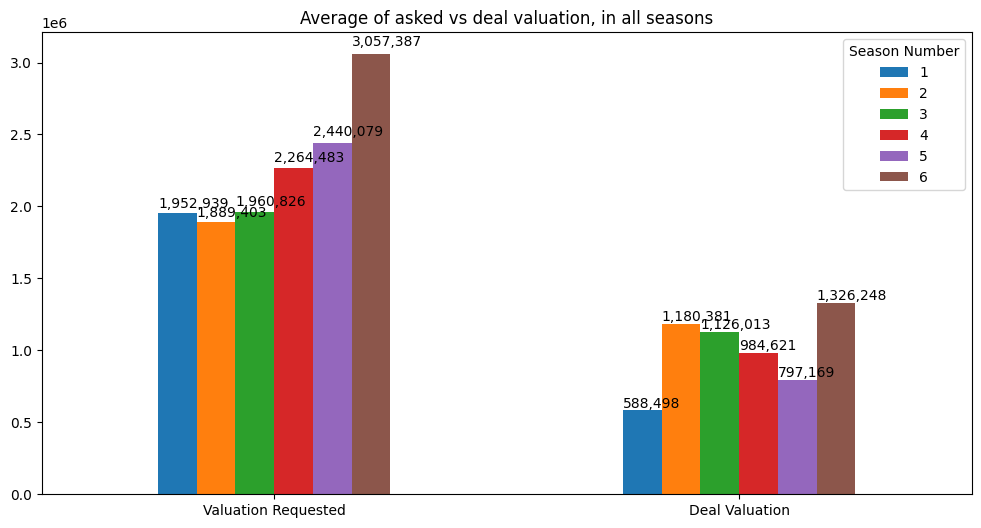

In [20]:
# All seasons average of offered/deal valuation
ax = pd.pivot_table(shark_tank, values=['Valuation Requested','Deal Valuation'], columns='Season Number', aggfunc=np.mean, sort=False).plot.bar(figsize=(12,6), title="Average of asked vs deal valuation, in all seasons")
plt.xticks(rotation='horizontal')
for t in ax.patches:
    if (np.isnan(float(t.get_height()))):
        ax.annotate(0, (t.get_x(), 0))
    else:
        ax.annotate(str(format(int(t.get_height()), ',d')), (t.get_x(), t.get_height()*1.02))

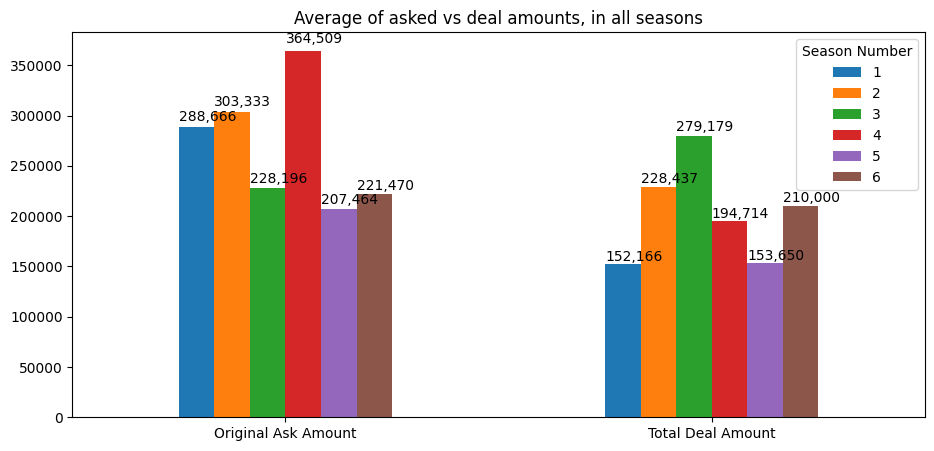

In [21]:
# All seasons average of offered/deal amounts
ax = pd.pivot_table(shark_tank, values=['Original Ask Amount','Total Deal Amount'], columns='Season Number', aggfunc=np.mean, sort=False).plot.bar(figsize=(11,5), title="Average of asked vs deal amounts, in all seasons")
plt.xticks(rotation='horizontal')
for t in ax.patches:
    if (np.isnan(float(t.get_height()))):
        ax.annotate(0, (t.get_x(), 0))
    else:
        ax.annotate(str(format(int(t.get_height()), ',d')), (t.get_x(), t.get_height()*1.02))

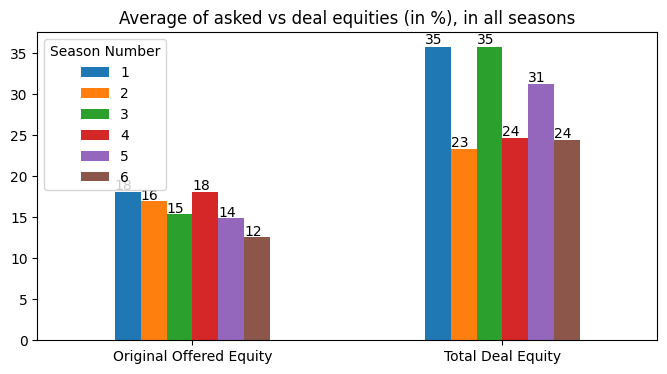

In [22]:
# All seasons average of offered/deal equities
ax = pd.pivot_table(shark_tank, values=['Original Offered Equity','Total Deal Equity'], columns='Season Number', aggfunc=np.mean, sort=False).plot.bar(figsize=(8,4), title="Average of asked vs deal equities (in %), in all seasons")
plt.xticks(rotation='horizontal')
for t in ax.patches:
    if (np.isnan(float(t.get_height()))):
        ax.annotate(0, (t.get_x(), 0))
    else:
        ax.annotate(str(format(int(t.get_height()), ',d')), (t.get_x(), t.get_height()*1.01))

Pitchers Gender
Male          148
Female         85
Couple         30
Mixed Team     12
Name: count, dtype: int64 

Pitchers Gender
Male          54%
Female        31%
Couple        11%
Mixed Team     4%
Name: proportion, dtype: object 



Text(0, 0.5, '')

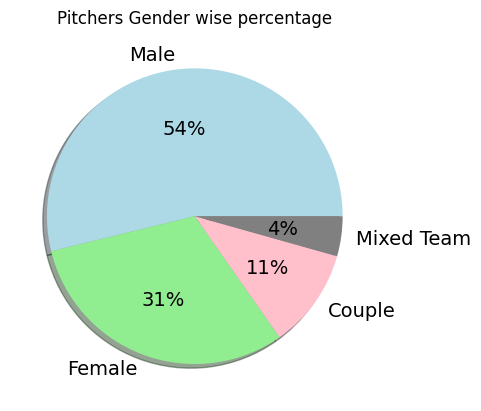

In [23]:
# Gender wise
print(shark_tank['Pitchers Gender'].value_counts(),"\n")

# In percentage
print(round(shark_tank['Pitchers Gender'].value_counts(normalize=True)*100).astype(str).str.replace('.0', '%', regex=False),"\n")

plt.title("Pitchers Gender wise percentage")
shark_tank["Pitchers Gender"].value_counts().plot(kind='pie', autopct='%.0f%%', colors=["lightblue", "lightgreen", "pink", "gray"], shadow=True, fontsize=14)
plt.ylabel('')

Pitchers Average Age
Middle    217
Young      41
Old        17
Name: count, dtype: int64 

Pitchers Average Age
Middle    79%
Young     15%
Old        6%
Name: proportion, dtype: object 



Text(0, 0.5, '')

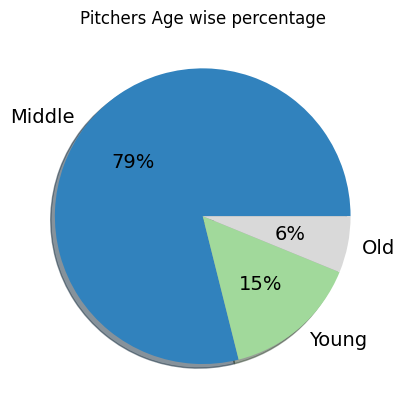

In [24]:
# Age wise
print(shark_tank['Pitchers Average Age'].value_counts(),"\n")

# In percentage
print(round(shark_tank['Pitchers Average Age'].value_counts(normalize=True)*100).astype(str).str.replace('.0', '%', regex=False),"\n")

plt.title("Pitchers Age wise percentage")
shark_tank["Pitchers Average Age"].value_counts().plot(kind='pie', autopct='%.0f%%', cmap='tab20c', shadow=True, fontsize=14)
plt.ylabel('')

### 💹 64% companies received offers and 36% startups could not convince Sharks to invest

Received Offer
1    179
0    100
Name: count, dtype: Int64 

Received Offer
1    64%
0    36%
Name: proportion, dtype: object


Text(0, 0.5, '')

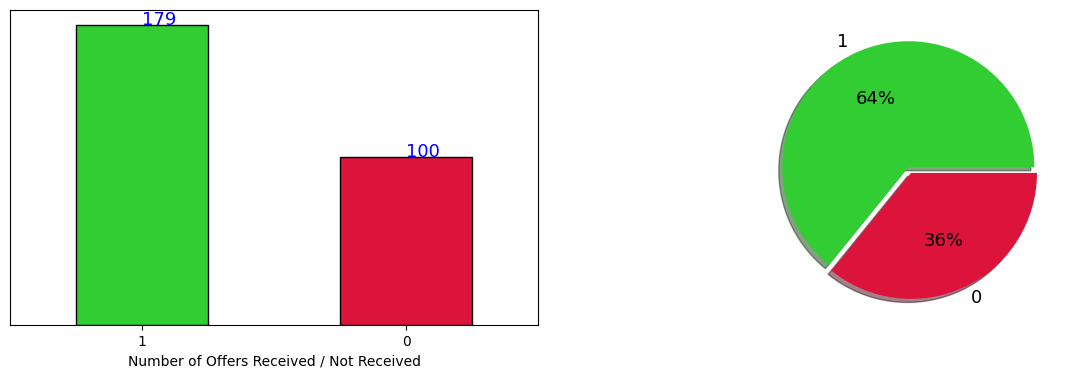

In [25]:
# Offers received
print(shark_tank['Received Offer'].value_counts(), "\n")
print(round(shark_tank['Received Offer'].value_counts(normalize=True)*100).astype(str).str.replace('.0', '%', regex=False))

plt.figure(figsize = (15,9))
ax1 = plt.subplot(221)
shark_tank["Received Offer"].value_counts().plot(kind='bar', color=["limegreen","crimson"], ec="k")
plt.xlabel("Number of Offers Received / Not Received")
plt.yticks([])
plt.xticks(rotation=0)
for x,y in enumerate(shark_tank["Received Offer"].value_counts()):
    plt.annotate(y, (x,y), fontsize=13, color="blue")
    
ax2 = plt.subplot(222)
shark_tank["Received Offer"].value_counts().plot(kind='pie', autopct='%.0f%%', explode = (0,0.05), colors=["limegreen","crimson"], shadow=True, fontsize=13)
plt.ylabel('')

# 179 companies received offers & 100 startups could not convince #Sharks to invest.

### ＄ 86% companies accepted offers and 14% startups didn't accept Sharks offer

Accepted Offer
1    154
0     25
Name: count, dtype: Int64 

Accepted Offer
1    86%
0    14%
Name: proportion, dtype: object


Text(0, 0.5, '')

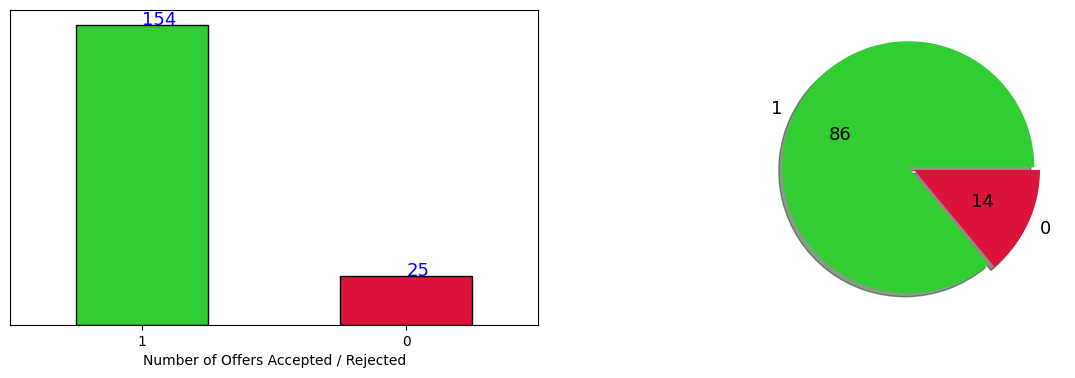

In [26]:
# Offers accepted
print(shark_tank['Accepted Offer'].value_counts(), "\n")
print(round(shark_tank['Accepted Offer'].value_counts(normalize=True)*100).astype(str).str.replace('.0', '%', regex=False))

plt.figure(figsize = (15, 9))
ax1 = plt.subplot(221)
shark_tank["Accepted Offer"].value_counts().plot(kind='bar', color=["limegreen","crimson"], ec="k")
plt.xlabel("Number of Offers Accepted / Rejected")
plt.yticks([])
plt.xticks(rotation = 0)
for x,y in enumerate(shark_tank["Accepted Offer"].value_counts()):
    plt.annotate(y, (x,y), fontsize=13, color="blue")
    
ax2 = plt.subplot(222)
shark_tank["Accepted Offer"].value_counts().plot(kind='pie', autopct='%.0f', explode = (0,0.05), colors=["limegreen","crimson"], shadow=True, fontsize=13)
plt.ylabel('')

# 154 companies accepted investments they got & 25 #Startups did not accept Shark's offer.

In [27]:
# Offers rejected by pitchers/startup companies
print(shark_tank[shark_tank['Accepted Offer']==0]["Startup Name"].count())
shark_tank.loc[shark_tank['Accepted Offer']==0, ["Season Number","Startup Name","Industry","Original Ask Amount","Original Offered Equity"]]

25


Season Number               Startup Name                 Industry  \
9                1                   Surfsafe  Fitness/Sports/Outdoors   
16               1                Expocentric        Business Services   
29               1             ThePartyPeople        Business Services   
35               1                  WeTeachMe       Children/Education   
44               1                      crisp        Food and Beverage   
64               2                CleverScore  Fitness/Sports/Outdoors   
66               2                    DISRUPT  Fitness/Sports/Outdoors   
75               2              OrmsbyGuitars           Lifestyle/Home   
103              2                  parkhound        Business Services   
105              2                        Mup           Lifestyle/Home   
118              3  GenerationOutcastClothing           Fashion/Beauty   
126              3                 OverTheMoo        Food and Beverage   
133              3               SleepingDuck           Lifestyle/Home   
148              3                   Speedfit  Fitness/Sports/Outdoors   
151              3                Hummingbird        Food and Beverage   
158              3                 BuckleMeUp            Software/Tech   
166              4           YourMatesBrewery           Liquor/Alcohol   
167              4               BistroMorgan        Food and Beverage   
187              4                     Vodka+          Health/Wellness   
188              4                     Gamify            Software/Tech   
233              5                EasyTattInc           Fashion/Beauty   
239              5                    Vanable        Business Services   
249              6                KingsofNeon        Business Services   
257              6                    Dundies             Pet Products   
262              6                      Paire           Fashion/Beauty   

     Original Ask Amount  Original Offered Equity  
9               120000.0                      5.0  
16             2000000.0                     10.0  
29              400000.0                      5.0  
35              200000.0                      2.5  
44              700000.0                     10.0  
64              200000.0                     25.0  
66              250000.0                      5.8  
75              200000.0                     10.0  
103             400000.0                     10.0  
105             300000.0                      5.0  
118              90000.0                     10.0  
126             250000.0                      8.0  
133             500000.0                      5.0  
148             280000.0                     10.0  
151             200000.0                     10.0  
158             390000.0                     10.0  
166             750000.0                     25.0  
167             200000.0                     20.0  
187             250000.0                     10.0  
188             200000.0                     10.0  
233             300000.0                     15.0  
239             300000.0                      5.0  
249             300000.0                      3.0  
257              75000.0                     15.0  
262             500000.0                      2.5

Pitchers Gender
Male          89
Female        56
Couple        21
Mixed Team    10
Name: count, dtype: int64


Text(0, 0.5, '')

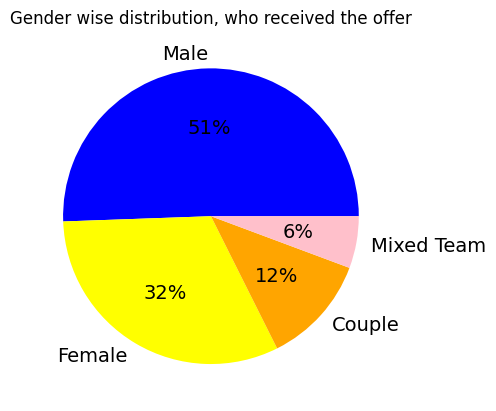

In [28]:
# Gender wise distribution, who received the offer
print(shark_tank[shark_tank['Received Offer']==1]['Pitchers Gender'].value_counts())
plt.title("Gender wise distribution, who received the offer")
shark_tank[shark_tank['Received Offer']==1]['Pitchers Gender'].value_counts().sort_values(ascending=False).plot.pie(autopct='%.0f%%',colors=["blue", "yellow", "orange", "pink"], fontsize=14)
plt.ylabel('')

Pitchers Gender
Male          59
Female        29
Couple         9
Mixed Team     2
Name: count, dtype: int64


Text(0, 0.5, '')

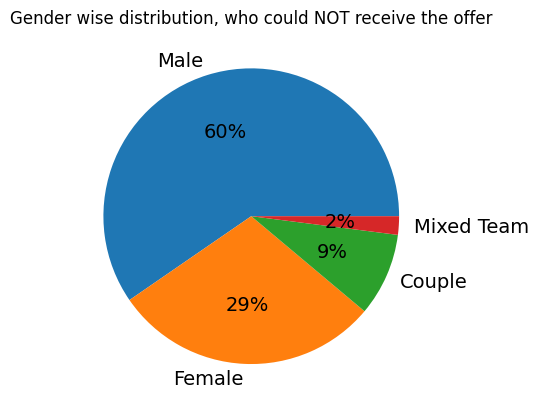

In [29]:
# Gender wise distribution, who could NOT receive the offer
print(shark_tank[shark_tank['Received Offer']==0]['Pitchers Gender'].value_counts())
plt.title("Gender wise distribution, who could NOT receive the offer")
shark_tank[shark_tank['Received Offer']==0]['Pitchers Gender'].value_counts().sort_values(ascending=False).plot.pie(autopct='%.0f%%', fontsize=14)
plt.ylabel('')

## ❗ AUS Shark Tank dataset Visualizations/infographics in Tableau Public —
### https://public.tableau.com/views/SharkTankAustraliaDataAnalysis/SharkTankUSStory

In [30]:
IFrame("https://public.tableau.com/views/SharkTankAustraliaDataAnalysis/SharkTankUSStory", width=1100, height=1100)

In [31]:
# Maximum amount requested
print("Maximum amount requested, by a pitcher -", format_currency(shark_tank['Original Ask Amount'].max(), 'AUD', locale='en_US').replace(".00", ""))

Maximum amount requested, by a pitcher - A$5,000,000


In [32]:
# Least amount requested
print("Least amount requested, by a pitcher -", format_currency(shark_tank['Original Ask Amount'].min(), 'AUD', locale='en_US').replace(".00", ""))

Least amount requested, by a pitcher - A$0


In [33]:
# Sum of investment amount asked, in Shark Tank Australia
print("Sum of investment amount asked, by all startup companies, in Australia Shark Tank -", format_currency(shark_tank['Original Ask Amount'].sum(), 'AUD', locale='en_US').replace(".00", ""))

Sum of investment amount asked, by all startup companies, in Australia Shark Tank - A$77,223,021


In [34]:
# Amount invested by all sharks, in Australia SharkTank
print("Amount invested by all sharks, in Shark Tank Australia -", format_currency(shark_tank['Total Deal Amount'].sum(), 'AUD', locale='en_US').replace(".00", ""))

Amount invested by all sharks, in Shark Tank Australia - A$31,924,032


In [35]:
# Sum of loan/debt amount, in Australian Shark Tank
print("Sum of loan/debt amount, given by all sharks, in Australian SharkTank -", format_currency(shark_tank['Loan'].sum(), 'AUD', locale='en_US').replace(".00", ""))

Sum of loan/debt amount, given by all sharks, in Australian SharkTank - A$3,110,000


In [36]:
# Top 15 investments, as per total investment/deal amount
print(shark_tank.groupby('Startup Name')['Total Deal Amount'].max().nlargest(15))

shark_tank['Total Deal Amount in Millions'] = shark_tank['Total Deal Amount']/1000000
tmpdf = shark_tank.sort_values('Total Deal Amount in Millions', ascending=False)[0:15]
fig = px.bar(tmpdf, x="Startup Name", y='Total Deal Amount in Millions', color="Startup Name", title="Highest investment as per deal amount (in millions)", text=tmpdf['Total Deal Amount in Millions'].map(float).map(str))
fig.show(renderer="iframe")

# iCapsulate has biggest deal in #SharkTankAustralia history

Startup Name
iCapsulate           2500000.0
PaleoCafé             750000.0
OneWorld              700000.0
LilFairyDoor          650000.0
ScopeITEducation      632000.0
GanacheChocolate      600000.0
OnTheGoSports         600000.0
CancerAid             500000.0
Flashback             500000.0
TORQUESAFE            500000.0
SharknadoAlive        475000.0
BurleighWagon         450000.0
ClutchGlue            400000.0
MiniPallets           400000.0
TheLittlePotionCo     400000.0
Name: Total Deal Amount, dtype: float64


In [37]:
# Top 20 investments, as per total equity/shares percentage diluted
print(shark_tank.groupby('Startup Name')['Total Deal Equity'].max().nlargest(20))

tmpdf = shark_tank.sort_values('Total Deal Equity', ascending=False)[0:20]
fig = px.bar(tmpdf, x="Startup Name", y='Total Deal Equity', color="Startup Name", title="Highest investment as per equity percentage", text=tmpdf['Total Deal Equity'].map(int).map(str) + "%")
fig.show(renderer="iframe")

# 1 startup (Catch'N'Release) sold entire company (equity) to Sharks

Startup Name
Catch'N'Release           100.0
Sundust                    75.0
CharliChair                50.0
EctoHandPlanes             50.0
EdibleBugShop              50.0
Hamdog                     50.0
JAMtheLabel                50.0
MelanieNewman              50.0
SharknadoAlive             50.0
THREE65                    50.0
TORQUESAFE                 50.0
TommySugo                  50.0
HitWithME                  49.0
Nevabuds                   49.0
NevermindAdventure         49.0
SweetMickie                46.0
JimalieCoconutProducts     45.0
Koja                       45.0
synxsole                   45.0
Deliciou                   44.0
Name: Total Deal Equity, dtype: float64


In [38]:
# Startups who sold exactly 1/3rd of their company (equity) to Sharks
print(shark_tank.loc[shark_tank['Total Deal Equity'] == 33][["Startup Name"]].count())
print(shark_tank.loc[shark_tank['Total Deal Equity'] == 33][["Season Number","Startup Name", "Total Deal Equity"]])

tmpdf = shark_tank.loc[shark_tank['Total Deal Equity'] == 33]
fig = px.bar(tmpdf, x="Startup Name", y='Total Deal Equity', color="Startup Name", title="Startups who sold 1/3rd of their company", text=tmpdf['Total Deal Equity'].map(int).map(str) + "%")
fig.show(renderer="iframe")

Startup Name    8
dtype: int64
     Season Number     Startup Name  Total Deal Equity
38               1  TheDinnerLadies               33.0
113              2         OneWorld               33.0
122              3     HeyDayButter               33.0
146              3        JustJerky               33.0
203              4       SnapSocial               33.0
223              5         FireHalo               33.0
234              5     CinnamonCove               33.0
267              6            Tilda               33.0


In [39]:
# Startups who sold more than 1/3rd of their company (equity) to Sharks
print(shark_tank.loc[shark_tank['Total Deal Equity'] > 32 ][["Startup Name"]].count())
print(shark_tank.loc[shark_tank['Total Deal Equity'] > 32 ][["Season Number","Startup Name", "Total Deal Equity"]])

tmpdf = shark_tank.loc[shark_tank['Total Deal Equity'] > 32 ].sort_values('Total Deal Equity', ascending=False)
fig = px.bar(tmpdf, x="Startup Name", y='Total Deal Equity', color="Startup Name", title="Startups who sold more than 1/3rd of their company", text=tmpdf['Total Deal Equity'].map(int).map(str) + "%")
fig.show(renderer="iframe")

Startup Name    55
dtype: int64
     Season Number            Startup Name  Total Deal Equity
2                1              CASEBOARDS               35.0
3                1                  Hamdog               50.0
4                1           EdibleBugShop               50.0
18               1                Ranchero               40.0
20               1              RescueSwag               40.0
27               1              Bottlepops               40.0
32               1               TommySugo               50.0
36               1             CharliChair               50.0
38               1         TheDinnerLadies               33.0
39               1      GrownWoodenEyewear               40.0
46               1                FlyBabee               38.0
47               1                 THREE65               50.0
50               1                    Koja               45.0
54               1                synxsole               45.0
58               1      PiccaninnyTiny

In [40]:
# Startups who got Debt/loan amount
print("Number of startups who got debt/loan amount", shark_tank['Loan'].count(),"\n")

shark_tank.loc[shark_tank['Loan'] >= 1][["Season Number","Startup Name","Total Deal Amount","Total Deal Equity","Loan"]]

Number of startups who got debt/loan amount 26 



Season Number        Startup Name  Total Deal Amount  Total Deal Equity  \
0                1       CricketCooler           280000.0               20.0   
11               1      MobileTyreShop           250000.0               10.0   
22               1            HegsPegs           380000.0               15.0   
32               1           TommySugo           350000.0               50.0   
36               1         CharliChair           200000.0               50.0   
39               1  GrownWoodenEyewear            60000.0               40.0   
47               1             THREE65           120000.0               50.0   
50               1                Koja           150000.0               45.0   
55               1  HaloMedicalDevices           200000.0               21.0   
58               1  PiccaninnyTinyTots            40000.0               40.0   
59               1         sonseeWoman           100000.0               20.0   
82               2              CapHat           120000.0               10.0   
89               2         2WHEELBoard           100000.0                0.0   
96               2    SuperchargedFood           200000.0               35.0   
102              2           KisaPhone           200000.0               10.0   
106              2          PENTABLOCK           350000.0               17.0   
110              2        LilFairyDoor           650000.0               20.0   
111              2             vegepod           225000.0               20.0   
131              3           KafTanned           150000.0               25.0   
137              3    TheMondayFoodCo.           300000.0               40.0   
138              3              Cardly           250000.0               15.0   
141              3           BeFitFood           300000.0               33.3   
192              4              KidsCo           375000.0               25.0   
194              4         BareAndBoho            85000.0               30.0   
212              4           BirthBeat           200000.0               20.0   
276              6        MimiHaircare           350000.0               30.0   

         Loan  
0    200000.0  
11   100000.0  
22   280000.0  
32   200000.0  
36   100000.0  
39    20000.0  
47    60000.0  
50   100000.0  
55   100000.0  
58    20000.0  
59    80000.0  
82   120000.0  
89   100000.0  
96   100000.0  
102  100000.0  
106  200000.0  
110  325000.0  
111   75000.0  
131  100000.0  
137  200000.0  
138  100000.0  
141  100000.0  
192   75000.0  
194   55000.0  
212  100000.0  
276  100000.0

In [41]:
# Top 20 investments, as per total debt/loan amount
print(shark_tank.groupby('Startup Name')['Loan'].max().nlargest(20))

tmpdf = shark_tank.sort_values('Loan', ascending=False)[0:20]
fig = px.bar(tmpdf, x="Startup Name", y='Loan', color="Startup Name", title="Highest Investment as per Debt amount", text=tmpdf['Loan'])
fig.show(renderer="iframe")

Startup Name
LilFairyDoor          325000.0
HegsPegs              280000.0
CricketCooler         200000.0
PENTABLOCK            200000.0
TheMondayFoodCo.      200000.0
TommySugo             200000.0
CapHat                120000.0
2WHEELBoard           100000.0
BeFitFood             100000.0
BirthBeat             100000.0
Cardly                100000.0
CharliChair           100000.0
HaloMedicalDevices    100000.0
KafTanned             100000.0
KisaPhone             100000.0
Koja                  100000.0
MimiHaircare          100000.0
MobileTyreShop        100000.0
SuperchargedFood      100000.0
sonseeWoman            80000.0
Name: Loan, dtype: float64


In [42]:
# Startups who gave Royalty
print("Number of startups who gave Royalty", shark_tank['Royalty Deal'].count(),"\n")

shark_tank.loc[shark_tank['Royalty Deal'] >= 1][["Season Number","Startup Name","Total Deal Amount","Total Deal Equity"]]

Number of startups who gave Royalty 11 



Season Number             Startup Name  Total Deal Amount  \
20               1               RescueSwag           100000.0   
120              3          Catch'N'Release           200000.0   
163              3             FreshMeals2U           200000.0   
217              5                   Stryda            50000.0   
231              5             WuliGrooming           150000.0   
238              5  HolidayCelebrationTrees           300000.0   
241              5                  GetDown           160000.0   
243              5           YaalaSparkling           125000.0   
266              6                TasteBubs           250000.0   
268              6        TheLittlePotionCo           400000.0   
269              6            BurleighWagon           450000.0   

     Total Deal Equity  
20                40.0  
120              100.0  
163               25.0  
217               30.0  
231               40.0  
238               30.0  
241               40.0  
243               20.0  
266               40.0  
268               20.0  
269               25.0

Season Number  1  2  3  4  5  6
Royalty Deal   1  0  2  0  5  3


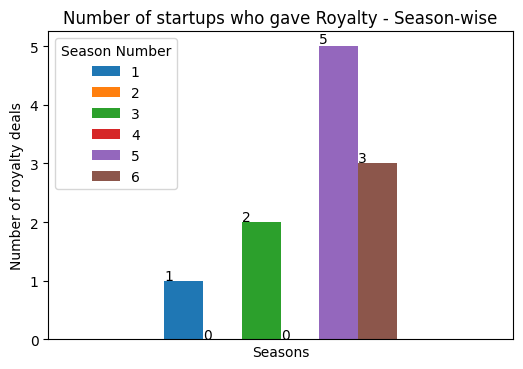

In [43]:
# Season-wise number of royalty deals
tmp = pd.pivot_table(shark_tank, values='Royalty Deal', columns='Season Number', aggfunc='count')
print(tmp)
ax = tmp.plot.bar(figsize=(6,4), title="Number of startups who gave Royalty - Season-wise")
plt.xlabel("Seasons")
plt.ylabel("Number of royalty deals")
plt.xticks([])
for t in ax.patches:
    if (np.isnan(float(t.get_height()))):
        ax.annotate(0, (t.get_x(), 0))
    else:
        ax.annotate(str(format(int(t.get_height()), ',d')), (t.get_x(), t.get_height()*1.01))

## SharkTank America/USA statistics & data analysis https://kaggle.com/code/thirumani/shark-tank-us-data-analysis

In [44]:
# Startups who gave Advisory shares
print("Number of startups who gave Advisory shares/equity", shark_tank['Advisory Shares Equity'].count(),"\n")

shark_tank.loc[shark_tank['Advisory Shares Equity'] > 0][["Season Number","Startup Name","Total Deal Amount","Total Deal Equity", "Advisory Shares Equity"]]

Number of startups who gave Advisory shares/equity 0 



Empty DataFrame
Columns: [Season Number, Startup Name, Total Deal Amount, Total Deal Equity, Advisory Shares Equity]
Index: []

In [45]:
# Deals with conditions
print("Number of startups who accepted conditional deals", shark_tank['Deal Has Conditions'].count(),"\n")

shark_tank.loc[shark_tank['Deal Has Conditions'] == 'yes'][["Season Number","Startup Name","Total Deal Amount","Total Deal Equity"]]

Number of startups who accepted conditional deals 10 



Season Number        Startup Name  Total Deal Amount  Total Deal Equity
46               1            FlyBabee            80000.0               38.0
82               2              CapHat           120000.0               10.0
89               2         2WHEELBoard           100000.0                0.0
138              3              Cardly           250000.0               15.0
147              3  WishUWereHereDolls            25000.0               40.0
163              3        FreshMeals2U           200000.0               25.0
185              4    GanacheChocolate           600000.0               40.0
206              4           SpacetoCo           210000.0               20.0
220              5             Sundust           100000.0               75.0
272              6              Guarda           250000.0                3.0

In [46]:
# Startups who received Mentorship
print("Number of startups who got mentorship", shark_tank['Mentorship'].count(),"\n")

shark_tank.loc[shark_tank['Mentorship'].notnull()][["Season Number","Pitch Number","Startup Name","Mentorship"]]

Number of startups who got mentorship 8 



Season Number  Pitch Number     Startup Name  Mentorship
120              3           121  Catch'N'Release       Naomi
123              3           124      ThePoleRoom      Janine
139              3           140           360Gym  Steve,Glen
143              3           144     BethanyGrace      Janine
159              3           160   CrookedCompass       Naomi
167              4           168     BistroMorgan      Janine
188              4           189           Gamify       Naomi
211              4           212    MinnowDesigns       Naomi

In [47]:
shark_tank.groupby('Mentorship')['Mentorship'].value_counts().sort_values(ascending=False)

# Naomi has offered Mentorship to more startups

Mentorship
Naomi         4
Janine        3
Steve,Glen    1
Name: count, dtype: int64

In [48]:
# Gender/age wise pitchers combination
shark_tank.groupby([shark_tank['Pitchers Gender'], shark_tank['Pitchers Average Age'], shark_tank['Multiple Entrepreneurs']]).size().nlargest(10)

# Solo males in middle age is most frequent combination followed by solo females in middle age

Pitchers Gender  Pitchers Average Age  Multiple Entrepreneurs
Male             Middle                0                         76
Female           Middle                0                         52
Male             Middle                1                         35
Couple           Middle                1                         29
Female           Middle                1                         17
Male             Young                 0                         12
                                       1                         11
                 Old                   0                         10
Female           Young                 0                          8
Mixed Team       Middle                1                          7
dtype: int64

## 💰 Which shark invested most ?

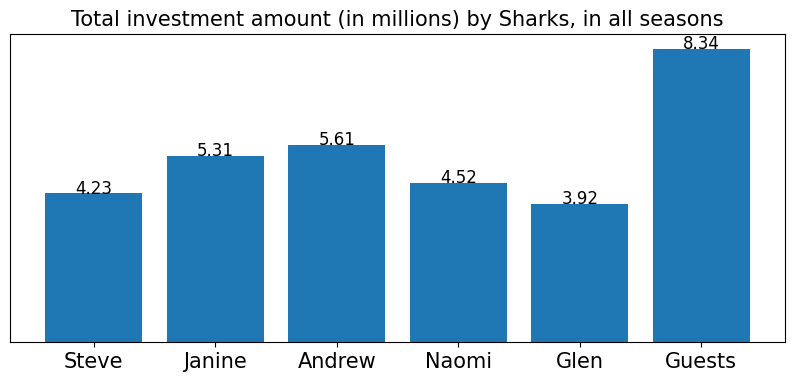

In [49]:
# Amount Invested by sharks, in all seasons
Amount = [(shark_tank['Steve Investment Amount']/1000000).sum(), (shark_tank['Janine Investment Amount']/1000000).sum(), (shark_tank['Andrew Investment Amount']/1000000).sum(), (shark_tank['Naomi Investment Amount']/1000000).sum(),
    (shark_tank['Glen Investment Amount']/1000000).sum(), (shark_tank['Guest Investment Amount']/1000000).sum()]
name=['Steve','Janine','Andrew','Naomi','Glen','Guests']
df = {'Name':name, 'Total Amount':Amount}
plt.figure(figsize=(10,4))
plt.bar(df['Name'], df['Total Amount'])
plt.xticks(fontsize=15)
plt.yticks([])
for index,d in enumerate(Amount):
    plt.text(x=index, y=d, s=f"{round(d,2)}", ha = 'center', fontdict=dict(fontsize=12))
plt.title("Total investment amount (in millions) by Sharks, in all seasons", fontsize=15)
plt.show()

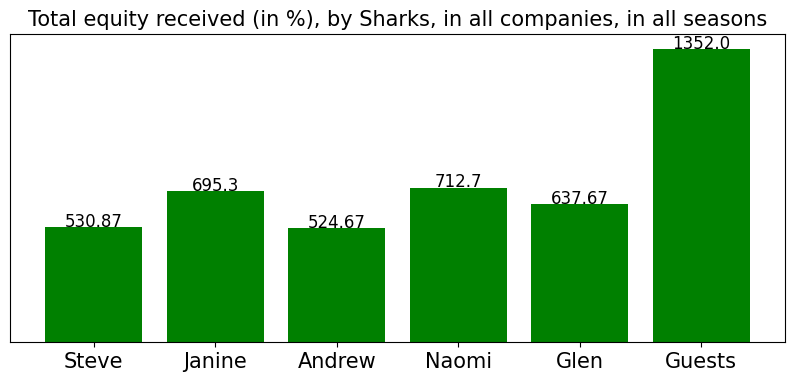

In [50]:
# Equity received by sharks, in all seasons
Equity = [shark_tank['Steve Investment Equity'].sum(), shark_tank['Janine Investment Equity'].sum(), shark_tank['Andrew Investment Equity'].sum(), shark_tank['Naomi Investment Equity'].sum(),
    shark_tank['Glen Investment Equity'].sum(), shark_tank['Guest Investment Equity'].sum()]
df = {'Name':name, 'Total Equity':Equity}
plt.figure(figsize=(10,4))
plt.bar(df['Name'], df['Total Equity'], color='g')
plt.xticks(fontsize=15)
plt.yticks([])
for index,d in enumerate(Equity):
    plt.text(x=index, y =d+2, s=f"{round(d,2)}", ha = 'center', fontdict=dict(fontsize=12))
plt.title("Total equity received (in %), by Sharks, in all companies, in all seasons", fontsize=15)
plt.show()

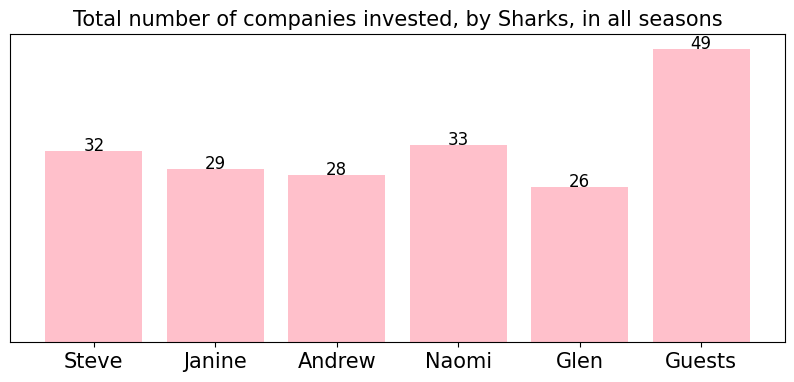

In [51]:
# Number of companies invested, in all seasons
Amount = [(shark_tank['Steve Investment Amount']).count(), (shark_tank['Janine Investment Amount']).count(), (shark_tank['Andrew Investment Amount']).count(), (shark_tank['Naomi Investment Amount']).count(),
    (shark_tank['Glen Investment Amount']).count(), (shark_tank['Guest Investment Amount']).count()]
df = {'Name':name, 'Total Amount':Amount}
plt.figure(figsize=(10,4))
plt.bar(df['Name'], df['Total Amount'], color='pink')
plt.xticks(fontsize=15)
plt.yticks([])
for index,d in enumerate(Amount):
    plt.text(x=index, y=d, s=f"{round(d,2)}", ha = 'center', fontdict=dict(fontsize=12))
plt.title("Total number of companies invested, by Sharks, in all seasons", fontsize=15)
plt.show()

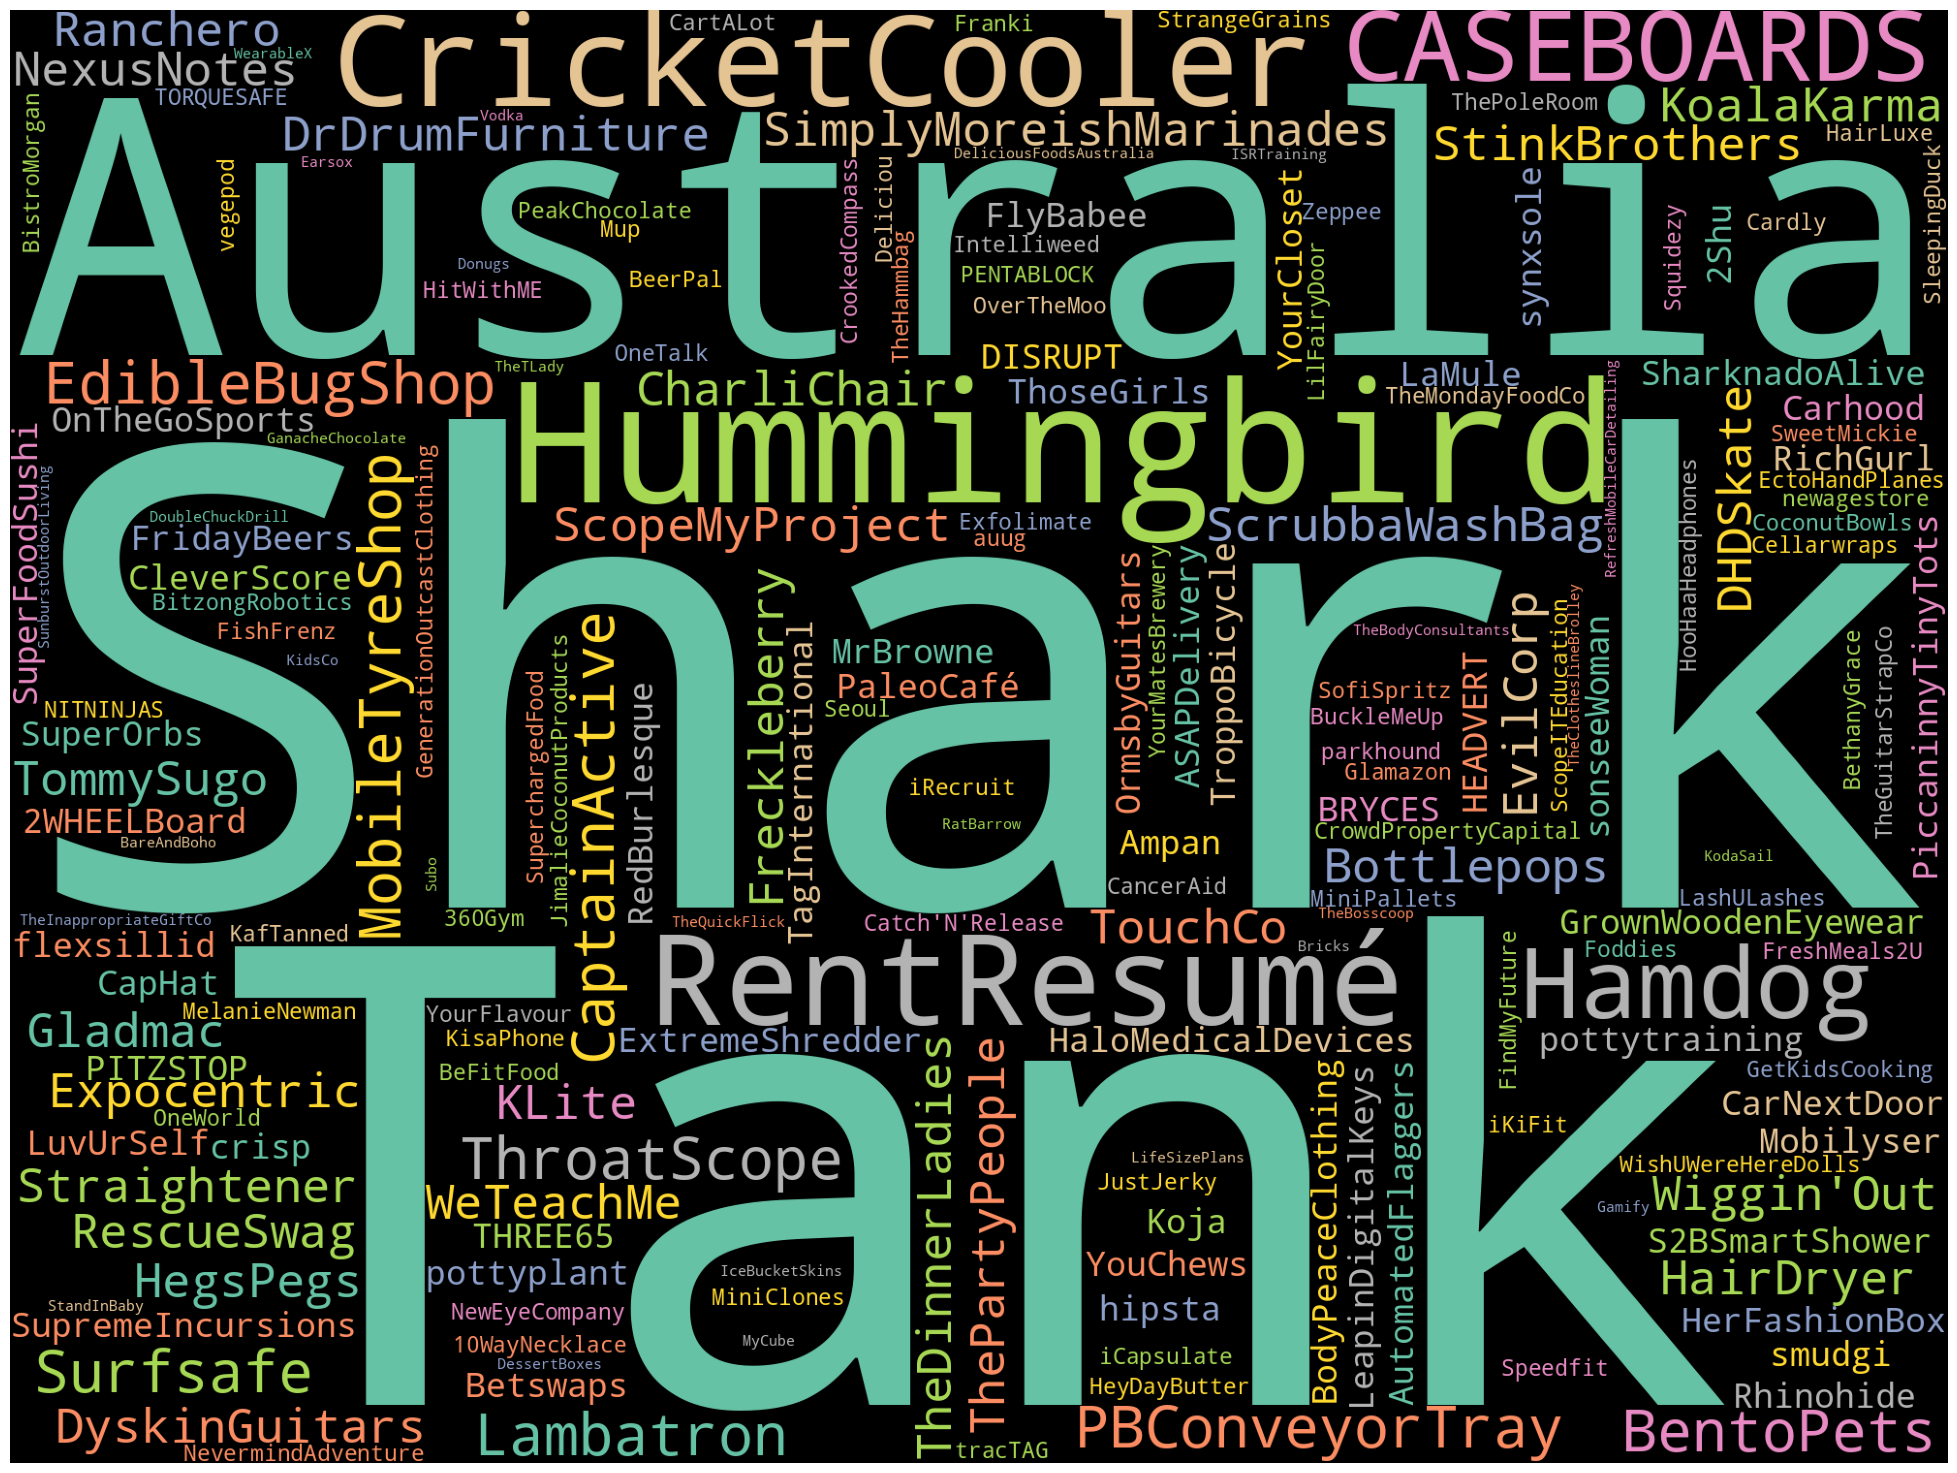

In [52]:
# Word cloud based on Startup Names, in all seasons
text = " Shark Tank Australia ".join(cat for cat in shark_tank['Startup Name'])
stop_words = list(STOPWORDS)
wordcloud = WordCloud(width=2000, height=1500, stopwords=stop_words, background_color='black', colormap='Set2', collocations=False, random_state=2025).generate(text)
plt.figure(figsize=(25,20))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

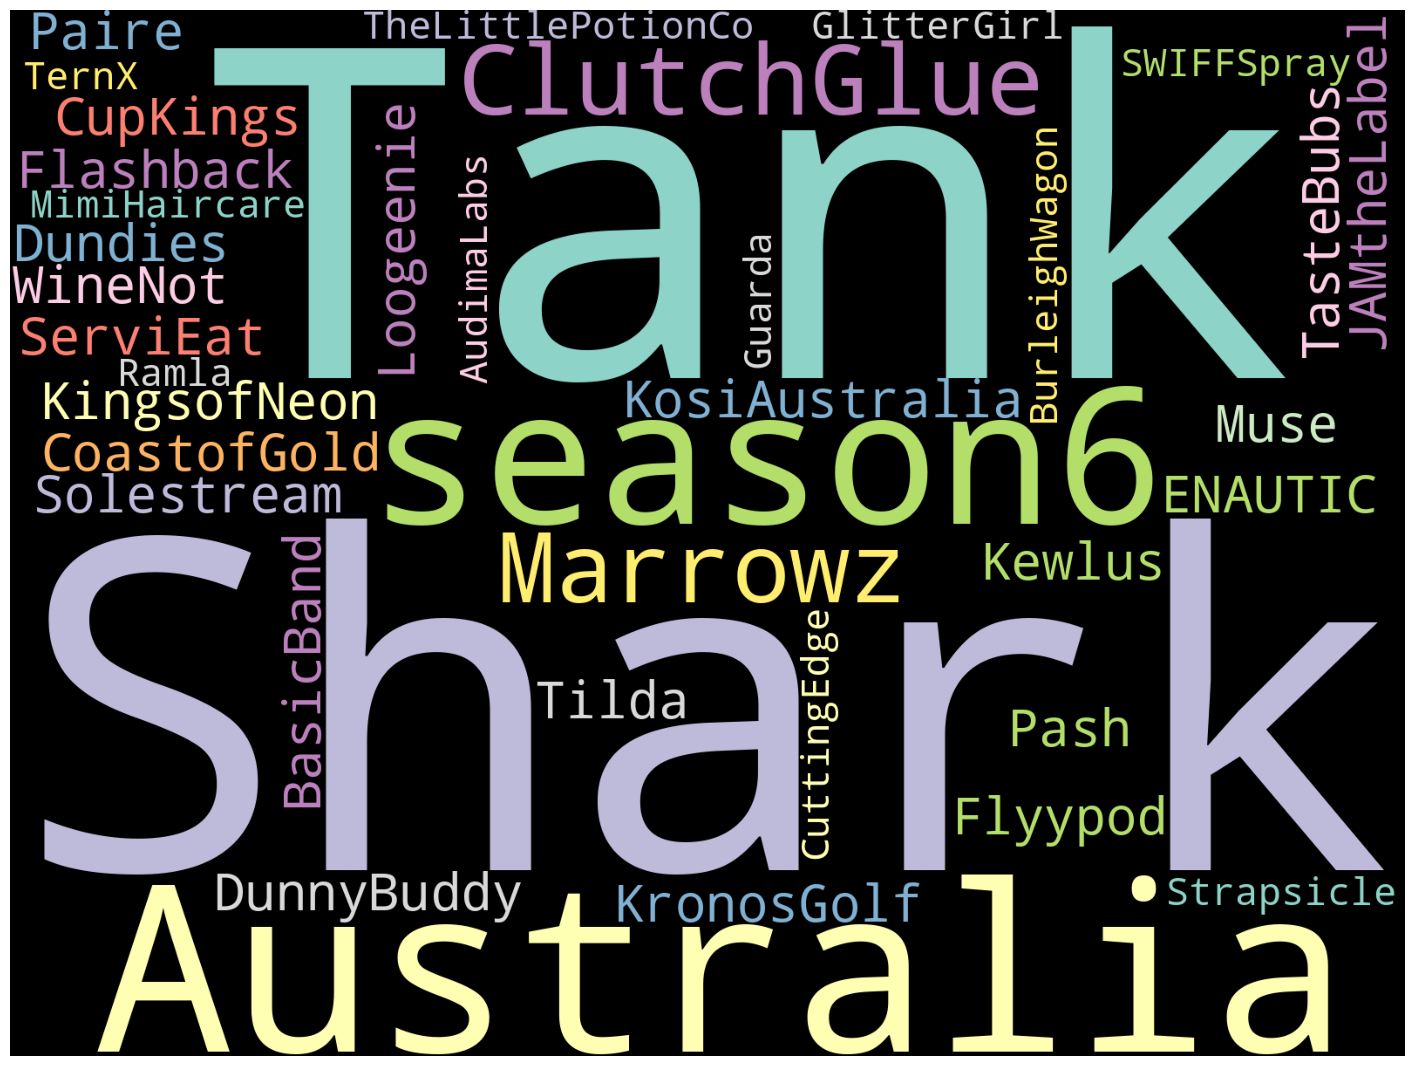

In [53]:
# Word cloud based on Startup Names, in current/latest season (6th season)
text = " Shark Tank Australia season6 ".join(cat for cat in shark_tank_recent['Startup Name'])
stop_words = list(STOPWORDS)
wordcloud = WordCloud(width=1600, height=1200, stopwords=stop_words, background_color='black', colormap='Set3', collocations=False, random_state=2025).generate(text)
plt.figure(figsize=(18,15))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

## 🔎 Shark Tank India Dataset https://www.kaggle.com/datasets/thirumani/shark-tank-india

## 🔥Steve Baxter's Investments

Total investments by Steve  32
Investment amount by Steve A$4,229,500
Equity received by Steve 530.87 % in different companies

Company details:
------------------------------------------------------------------------------------------
      Startup Name                Industry  Steve Investment Amount
       ThroatScope         Health/Wellness              76000.00000
    MobileTyreShop              Automotive             125000.00000
        RescueSwag          Lifestyle/Home             100000.00000
    ScrubbaWashBag             Electronics             180000.00000
        Bottlepops Fitness/Sports/Outdoors              75000.00000
      Hummingbirds      Children/Education              40000.00000
PiccaninnyTinyTots      Children/Education              20000.00000
        ThoseGirls       Food and Beverage              70000.00000
     OnTheGoSports Fitness/Sports/Outdoors             200000.00000
    SharknadoAlive     Media/Entertainment              95000.00000
       CarNextDo

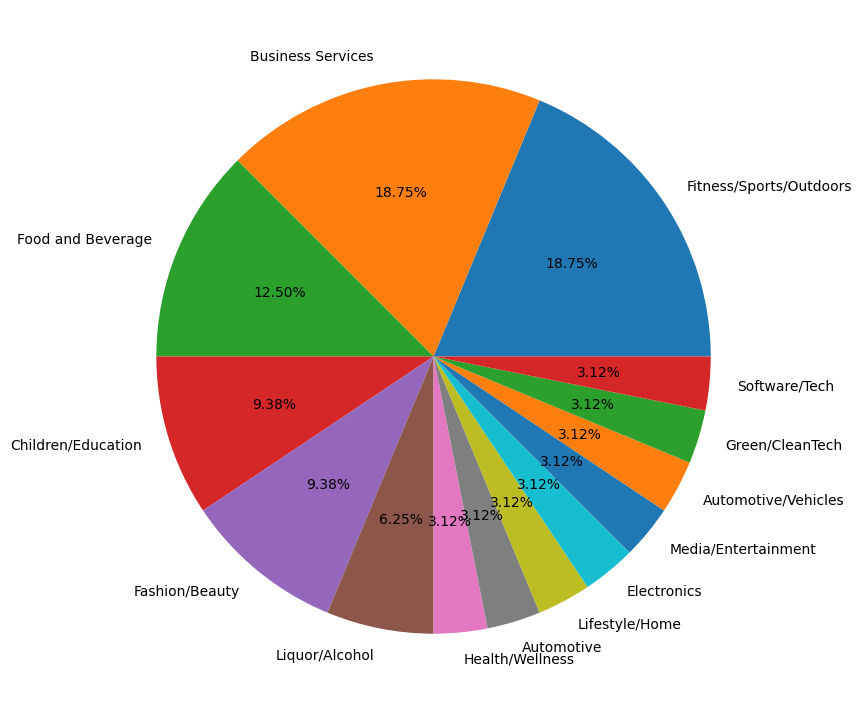

In [54]:
print("Total investments by Steve", shark_tank[shark_tank['Steve Investment Amount']>0][['Steve Investment Amount']].count().to_string()[-3:])
print("Investment amount by Steve", format_currency(shark_tank['Steve Investment Amount'].sum(), 'AUD', locale='en_US').replace(".00", ""))
print("Equity received by Steve", round(shark_tank['Steve Investment Equity'].sum(), 2), "% in different companies")

print("\nCompany details:")
print('-'*90)
print(shark_tank.loc[shark_tank['Steve Investment Amount']>0][["Startup Name","Industry","Steve Investment Amount"]].to_string(index=False))
print('-'*90)

print("\nSteve Baxter industry wise investments\n")
print(shark_tank[shark_tank['Steve Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False))
plt.figure(figsize = (15,9))
shark_tank[shark_tank['Steve Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False).plot.pie(autopct='%1.2f%%')
plt.ylabel('')
plt.show()

tmpdf = shark_tank.loc[shark_tank['Steve Investment Amount']>0] [["Startup Name","Steve Investment Amount","Steve Investment Equity"]].sort_values(by="Steve Investment Equity")
fig = px.treemap(tmpdf, path=['Startup Name'], values=tmpdf['Steve Investment Amount'], width=850, height=800)
fig.update_layout(margin = dict(t=5, l=5, r=5, b=5))
fig.update_traces(textposition='middle center')
fig.show(renderer="iframe")

## 🎇 Janine Allis's Investments

Total investments by Janine  29
Investment amount by Janine A$5,306,000
Equity received by Janine 695.3 % in different companies

Company details:
------------------------------------------------------------------------------------------
           Startup Name                Industry  Janine Investment Amount
             CASEBOARDS Fitness/Sports/Outdoors                   20000.0
          EdibleBugShop       Business Services                  170000.0
         ScrubbaWashBag             Electronics                  180000.0
              TommySugo       Food and Beverage                  350000.0
        TheDinnerLadies       Food and Beverage                  216000.0
               FlyBabee      Children/Education                   80000.0
                THREE65          Fashion/Beauty                   60000.0
          OnTheGoSports Fitness/Sports/Outdoors                  200000.0
         SharknadoAlive     Media/Entertainment                   95000.0
          HerFashionBo

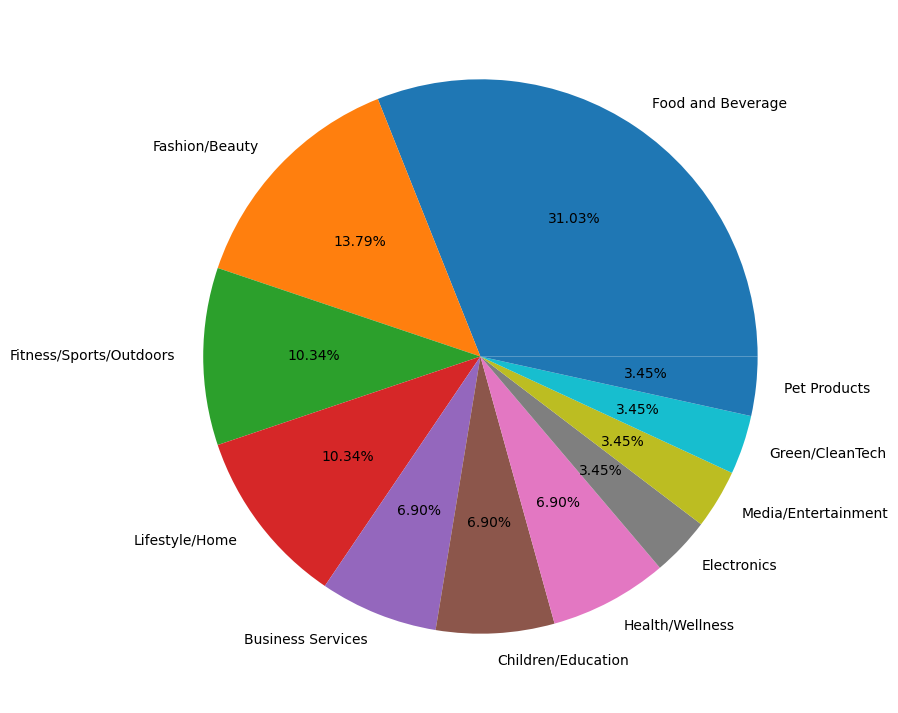

In [55]:
print("Total investments by Janine", shark_tank[shark_tank['Janine Investment Amount']>0][['Janine Investment Amount']].count().to_string()[-3:])
print("Investment amount by Janine", format_currency(shark_tank['Janine Investment Amount'].sum(), 'AUD', locale='en_US').replace(".00", ""))
print("Equity received by Janine", round(shark_tank['Janine Investment Equity'].sum(), 2), "% in different companies")

print("\nCompany details:")
print('-'*90)
print(shark_tank.loc[shark_tank['Janine Investment Amount']>0][["Startup Name","Industry","Janine Investment Amount"]].to_string(index=False))
print('-'*90)

print("\nJanine Allis industry wise investments\n")
print(shark_tank[shark_tank['Janine Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False))
plt.figure(figsize = (15,9))
shark_tank[shark_tank['Janine Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False).plot.pie(autopct='%1.2f%%')
plt.ylabel('')
plt.show()

tmpdf = shark_tank.loc[shark_tank['Janine Investment Amount']>0] [["Startup Name","Janine Investment Amount","Janine Investment Equity"]].sort_values(by="Janine Investment Equity")
fig = px.treemap(tmpdf, path=['Startup Name'], values=tmpdf['Janine Investment Amount'], width=850, height=800)
fig.update_layout(margin = dict(t=5, l=5, r=5, b=5))
fig.update_traces(textposition='middle center')
fig.show(renderer="iframe")

## ✳️ Andrew Banks's Investments

Total investments by Andrew  28
Investment amount by Andrew A$5,606,517
Equity received by Andrew 524.67 % in different companies

Company details:
------------------------------------------------------------------------------------------
      Startup Name                Industry  Andrew Investment Amount
        CASEBOARDS Fitness/Sports/Outdoors              2.000000e+04
            Hamdog       Food and Beverage              2.000000e+00
        Bottlepops Fitness/Sports/Outdoors              7.500000e+04
          synxsole          Fashion/Beauty              1.000000e+05
HaloMedicalDevices         Health/Wellness              1.000000e+05
     OnTheGoSports Fitness/Sports/Outdoors              2.000000e+05
    SharknadoAlive     Media/Entertainment              9.500000e+04
     HerFashionBox          Fashion/Beauty              1.000000e+05
         Rhinohide              Automotive              4.000000e+04
            CapHat          Fashion/Beauty              6.000000e+04
  

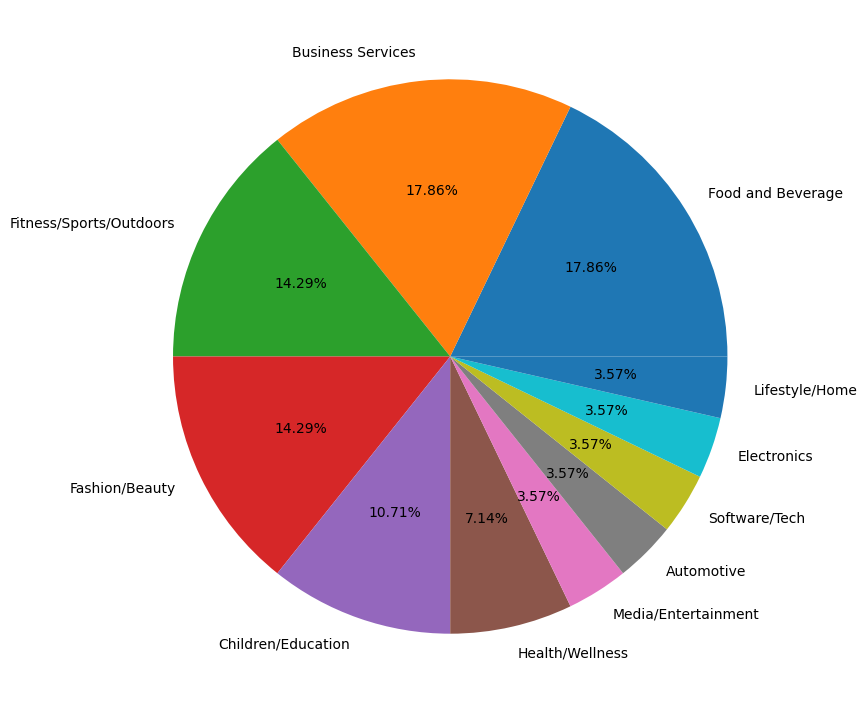

In [56]:
print("Total investments by Andrew", shark_tank[shark_tank['Andrew Investment Amount']>0][['Andrew Investment Amount']].count().to_string()[-3:])
print("Investment amount by Andrew", format_currency(shark_tank['Andrew Investment Amount'].sum(), 'AUD', locale='en_US').replace(".00", ""))
print("Equity received by Andrew", round(shark_tank['Andrew Investment Equity'].sum(), 2), "% in different companies")

print("\nCompany details:")
print('-'*90)
print(shark_tank.loc[shark_tank['Andrew Investment Amount']>0][["Startup Name","Industry","Andrew Investment Amount"]].to_string(index=False))
print('-'*90)

print("\nAndrew Banks industry wise investments\n")
print(shark_tank[shark_tank['Andrew Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False))
plt.figure(figsize = (15,9))
shark_tank[shark_tank['Andrew Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False).plot.pie(autopct='%1.2f%%')
plt.ylabel('')
plt.show()

tmpdf = shark_tank.loc[shark_tank['Andrew Investment Amount']>0] [["Startup Name","Andrew Investment Amount","Andrew Investment Equity"]].sort_values(by="Andrew Investment Equity")
fig = px.treemap(tmpdf, path=['Startup Name'], values=tmpdf['Andrew Investment Amount'], width=850, height=800)
fig.update_layout(margin = dict(t=5, l=5, r=5, b=5))
fig.update_traces(textposition='middle center')
fig.show(renderer="iframe")

## 🚀 Naomi Simson's Investments

Total investments by Naomi  33
Investment amount by Naomi A$4,520,015
Equity received by Naomi 712.7 % in different companies

Company details:
------------------------------------------------------------------------------------------
           Startup Name                Industry  Naomi Investment Amount
          CricketCooler Fitness/Sports/Outdoors                 280000.0
               HegsPegs          Lifestyle/Home                 380000.0
     GrownWoodenEyewear          Lifestyle/Home                  30000.0
                THREE65          Fashion/Beauty                  60000.0
     HaloMedicalDevices         Health/Wellness                 100000.0
            sonseeWoman          Fashion/Beauty                 100000.0
         SharknadoAlive     Media/Entertainment                  95000.0
       TagInternational Fitness/Sports/Outdoors                  50000.0
        ExtremeShredder Fitness/Sports/Outdoors                  50000.0
             YourCloset          Fa

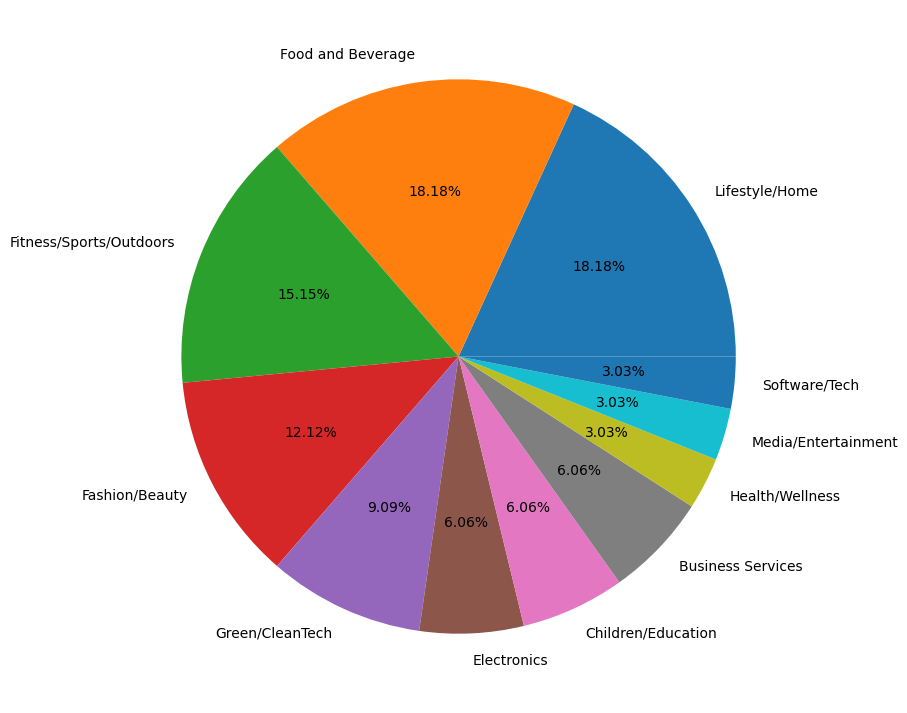

In [57]:
print("Total investments by Naomi", shark_tank[shark_tank['Naomi Investment Amount']>0][['Naomi Investment Amount']].count().to_string()[-3:])
print("Investment amount by Naomi", format_currency(shark_tank['Naomi Investment Amount'].sum(), 'AUD', locale='en_US').replace(".00", ""))
print("Equity received by Naomi", round(shark_tank['Naomi Investment Equity'].sum(), 2), "% in different companies")

print("\nCompany details:")
print('-'*90)
print(shark_tank.loc[shark_tank['Naomi Investment Amount']>0][["Startup Name","Industry","Naomi Investment Amount"]].to_string(index=False))
print('-'*90)

print("\nNaomi Simson industry wise investments\n")
print(shark_tank[shark_tank['Naomi Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False))
plt.figure(figsize = (15,9))
shark_tank[shark_tank['Naomi Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False).plot.pie(autopct='%1.2f%%')
plt.ylabel('')
plt.show()

tmpdf = shark_tank.loc[shark_tank['Naomi Investment Amount']>0] [["Startup Name","Naomi Investment Amount","Naomi Investment Equity"]].sort_values(by="Naomi Investment Equity")
fig = px.treemap(tmpdf, path=['Startup Name'], values=tmpdf['Naomi Investment Amount'], width=850, height=800)
fig.update_layout(margin = dict(t=5, l=5, r=5, b=5))
fig.update_traces(textposition='middle center')
fig.show(renderer="iframe")

## 🎾 Glen Richards's Investments

Total investments by Glen  26
Investment amount by Glen A$3,924,000
Equity received by Glen 637.67 % in different companies

Company details:
------------------------------------------------------------------------------------------
          Startup Name                Industry  Glen Investment Amount
        SharknadoAlive     Media/Entertainment             95000.00000
              Betswaps Fitness/Sports/Outdoors            100000.00000
             Rhinohide              Automotive             40000.00000
            pottyplant            Pet Products             70000.00000
         NewEyeCompany       Business Services             50000.00000
           Intelliweed         Green/CleanTech            175000.00000
             HitWithME Fitness/Sports/Outdoors             50000.00000
            SofiSpritz          Liquor/Alcohol             65000.00000
        GetKidsCooking      Children/Education            150000.00000
          LilFairyDoor      Children/Education           

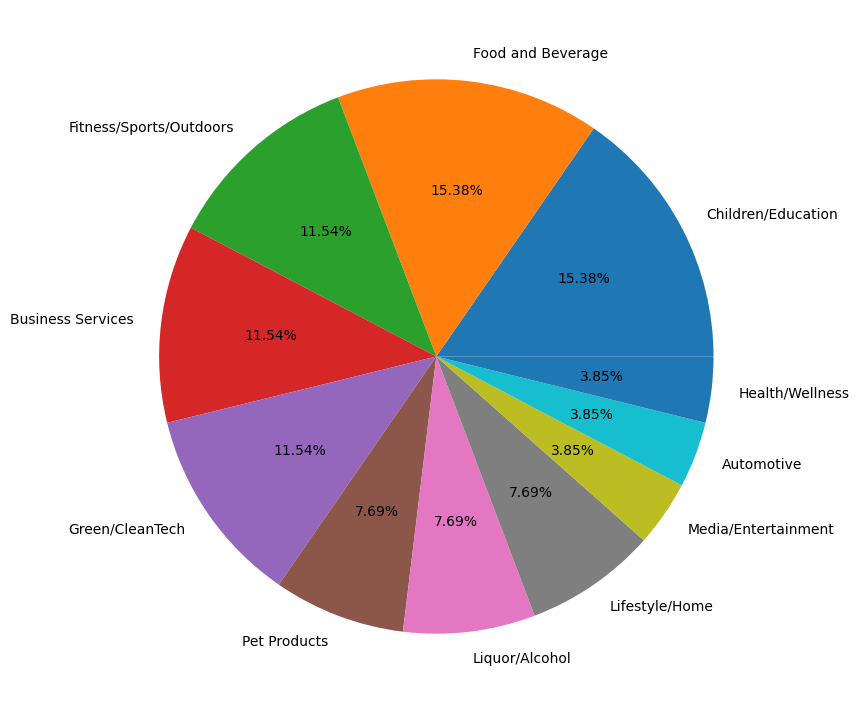

In [58]:
print("Total investments by Glen", shark_tank[shark_tank['Glen Investment Amount']>0][['Glen Investment Amount']].count().to_string()[-3:])
print("Investment amount by Glen", format_currency(shark_tank['Glen Investment Amount'].sum(), 'AUD', locale='en_US').replace(".00", ""))
print("Equity received by Glen", round(shark_tank['Glen Investment Equity'].sum(), 2), "% in different companies")

print("\nCompany details:")
print('-'*90)
print(shark_tank.loc[shark_tank['Glen Investment Amount']>0][["Startup Name","Industry","Glen Investment Amount"]].to_string(index=False))
print('-'*90)

print("\nGlen Richards industry wise investments\n")
print(shark_tank[shark_tank['Glen Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False))
plt.figure(figsize = (15,9))
shark_tank[shark_tank['Glen Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False).plot.pie(autopct='%1.2f%%')
plt.ylabel('')
plt.show()

tmpdf = shark_tank.loc[shark_tank['Glen Investment Amount']>0] [["Startup Name","Glen Investment Amount","Glen Investment Equity"]].sort_values(by="Glen Investment Equity")
fig = px.treemap(tmpdf, path=['Startup Name'], values=tmpdf['Glen Investment Amount'], width=850, height=800)
fig.update_layout(margin = dict(t=5, l=5, r=5, b=5))
fig.update_traces(textposition='middle center')
fig.show(renderer="iframe")

## 🎆 All Guest's Investments

Total investments by all Guests 49
Investment amount by all Guests A$8,338,000
Equity received by all Guests 1352.0 % in different companies

Company details:
--------------------------------------------------------------------------------------------
           Startup Name                Industry  Guest Investment Amount                                          Invested Guest Name
         MobileTyreShop              Automotive                 125000.0                                                 John McGrath
               Ranchero       Food and Beverage                  80000.0                                                 John McGrath
           Hummingbirds      Children/Education                  40000.0                                                 John McGrath
            CharliChair      Children/Education                 200000.0                                                 John McGrath
     GrownWoodenEyewear          Lifestyle/Home                  30000.0      

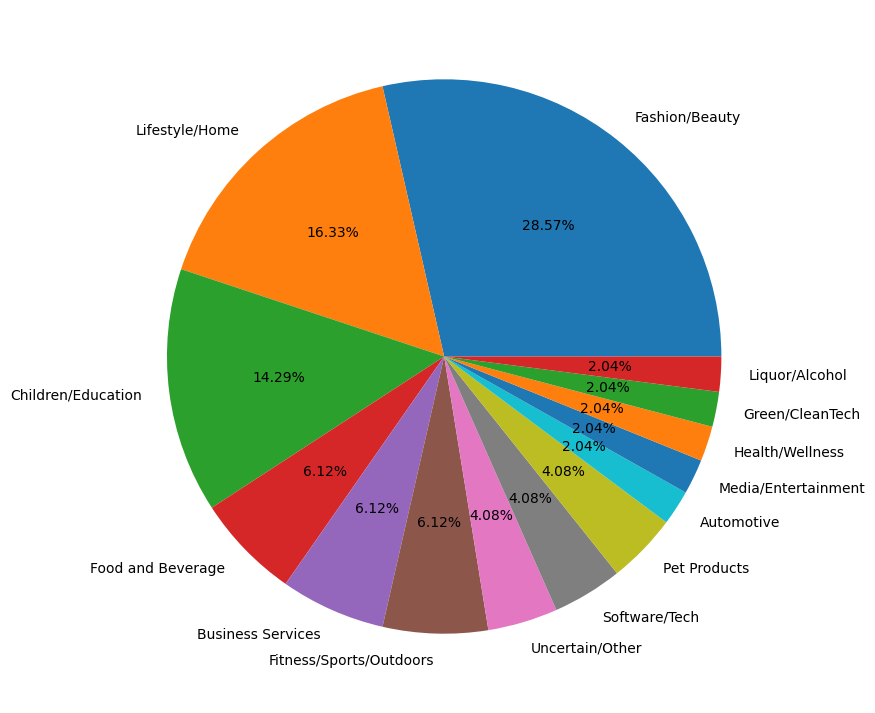

In [59]:
print("Total investments by all Guests", shark_tank[shark_tank['Guest Investment Amount']>0][['Guest Investment Amount']].count().to_string()[-2:])
print("Investment amount by all Guests", format_currency(shark_tank['Guest Investment Amount'].sum(), 'AUD', locale='en_US').replace(".00", ""))
print("Equity received by all Guests", round(shark_tank['Guest Investment Equity'].sum(), 2), "% in different companies")

print("\nCompany details:")
print('-'*92)
print(shark_tank.loc[shark_tank['Guest Investment Amount']>0][["Startup Name","Industry","Guest Investment Amount","Invested Guest Name"]].to_string(index=False))
print('-'*92)

print("\nAll Guests industry wise investments\n")
print(shark_tank[shark_tank['Guest Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False))
plt.figure(figsize = (15,9))
shark_tank[shark_tank['Guest Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False).plot.pie(autopct='%1.2f%%')
plt.ylabel('')
plt.show()

tmpdf = shark_tank.loc[shark_tank['Guest Investment Amount']>0] [["Startup Name","Guest Investment Amount","Guest Investment Equity"]].sort_values(by="Guest Investment Equity")
fig = px.treemap(tmpdf, path=['Startup Name'], values=tmpdf['Guest Investment Amount'], width=850, height=800)
fig.update_layout(margin = dict(t=5, l=5, r=5, b=5))
fig.update_traces(textposition='middle center')
fig.show(renderer="iframe")

In [60]:
# Guest sharks and number of companies they invested
shark_tank.loc[shark_tank['Guest Investment Amount'] > 1]['Invested Guest Name'].str.split(',').explode('Invested Guest Name').value_counts().sort_values(ascending=False)

Invested Guest Name
Davie Fogarty       18
Robert Herjavec     17
Jane Lu             14
John McGrath         7
Catriona Wallace     6
Maxine Horne         6
Sabri Suby           4
Nick Bell            3
JaneLu               1
Name: count, dtype: int64

In [61]:
# Investment amount by guests, in AUD
tmpdf = shark_tank.loc[shark_tank['Guest Investment Amount'] > 0][['Invested Guest Name','Guest Investment Amount']]
tmpdf['Number of Guests'] = tmpdf['Invested Guest Name'].str.count(',') + 1
tmpdf['Invetested Amount per Guest'] = tmpdf['Guest Investment Amount'] / tmpdf['Number of Guests']
tmpdf = tmpdf.set_index(tmpdf.columns.drop('Invested Guest Name',1).tolist())['Invested Guest Name'].str.split(',', expand=True).stack().reset_index().rename(columns={0:'Invested Guest Name'}).loc[:, tmpdf.columns]
round(tmpdf.groupby(["Invested Guest Name"])["Invetested Amount per Guest"].sum().sort_values(ascending=False))

Invested Guest Name
Davie Fogarty       2586250.0
Robert Herjavec     2296250.0
Maxine Horne        1127500.0
Jane Lu              956250.0
John McGrath         645000.0
Sabri Suby           336250.0
Catriona Wallace     250500.0
Nick Bell            127500.0
JaneLu                12500.0
Name: Invetested Amount per Guest, dtype: float64

Number of Sharks in Deal
1.0    100
2.0     44
3.0      6
5.0      2
4.0      2
Name: count, dtype: int64 

Number of Sharks in Deal
1.0    65%
2.0    29%
3.0     4%
5.0     1%
4.0     1%
Name: proportion, dtype: object


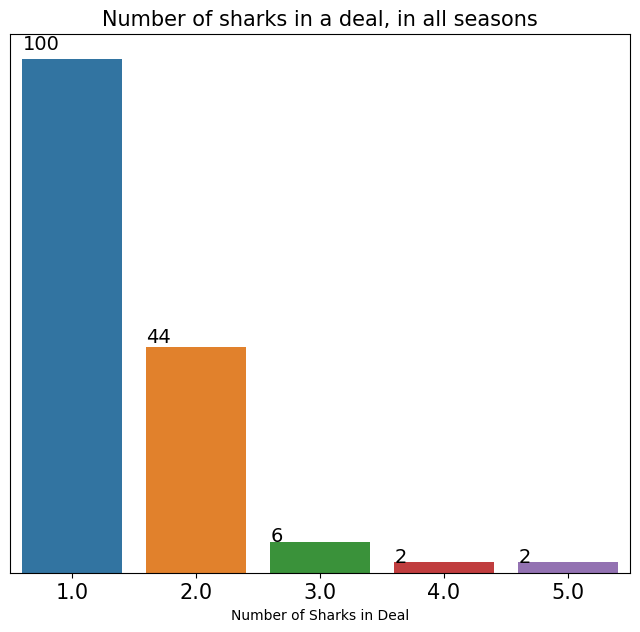

In [62]:
# Number of sharks in a deal, in all seasons
print(shark_tank['Number of Sharks in Deal'].value_counts(), "\n")

# In percentage
print(round(shark_tank['Number of Sharks in Deal'].value_counts(normalize=True)*100).astype(str).str.replace('.0', '%', regex=False))

fig = plt.figure(figsize=(8, 7))
plt.title("Number of sharks in a deal, in all seasons", fontsize=15)
plt.xticks(fontsize=15)
plt.yticks([])
ax = sns.countplot(data = shark_tank, x = 'Number of Sharks in Deal')
ax.set_ylabel('')
for t in ax.patches:
    if (np.isnan(float(t.get_height()))):
        ax.annotate(0, (t.get_x(), 0))
    else:
        ax.annotate(str(format(int(t.get_height()), ',d')), (t.get_x(), t.get_height()*1.02), size=14)

In [63]:
# All sharks deals
print(shark_tank.loc[shark_tank['Number of Sharks in Deal'] >= 5][["Season Number","Startup Name","Total Deal Amount","Total Deal Equity"]])

     Season Number    Startup Name  Total Deal Amount  Total Deal Equity
65               2  SharknadoAlive           475000.0               50.0
278              6      SWIFFSpray           200000.0               25.0


In [64]:
# Sharks with most number of solo deals
amt_cols = shark_tank.columns[shark_tank.columns.str.contains(' Investment Amount')].tolist()
tmp = shark_tank.loc[shark_tank['Number of Sharks in Deal'] == 1][amt_cols]
tmp.count().sort_values(ascending=False).nlargest(3)

# Naomi did most number of solo deals, than any other Shark

Guest Investment Amount     27
Naomi Investment Amount     22
Janine Investment Amount    15
dtype: int64

In [65]:
# Sharks with most number of episode presence, in all seasons
present_cols = shark_tank.columns[shark_tank.columns.str.endswith(' Present')].tolist()
tmp = shark_tank[present_cols]
tmp.sum().sort_values(ascending=False).nlargest(5)

# Steve,Janine,Andrew,Naomi was there in most number of episodes

Guest Present     370.0
Steve Present     216.0
Janine Present    216.0
Andrew Present    216.0
Naomi Present     216.0
dtype: float64

In [66]:
# Australia state-wise startups in SharkTank
tmp = shark_tank['Pitchers State'].value_counts().sort_values(ascending=True)
fig = px.bar(tmp, x=tmp.values, title="<b>State-wise</b> from where pitchers/startups came from", template='simple_white', text=tmp, width=550, height=450)
fig.update_yaxes(title_text="")
fig.update_xaxes(visible=False)
fig.show(renderer="iframe")

In [67]:
# Top 8 Australian cities
tmp = shark_tank['Pitchers City'].value_counts().nlargest(8).sort_values(ascending=True)
fig = px.bar(tmp, x=tmp.values, title="<b>Top 8 cities</b> with number of startups came for pitching", template='simple_white', text=tmp, width=550, height=600)
fig.update_yaxes(title_text="")
fig.update_xaxes(visible=False)
fig.show(renderer="iframe")

In [68]:
# Most frequently asked amount, by startups
shark_tank.groupby('Original Ask Amount').size().nlargest(10)

# Original Ask Amount (AUD) and Number of times asked

Original Ask Amount
200000.0    35
100000.0    24
250000.0    24
300000.0    23
50000.0     22
150000.0    14
80000.0     10
500000.0    10
60000.0      7
350000.0     6
dtype: int64

In [69]:
# Most frequently offered equity, by startups
shark_tank.groupby('Original Offered Equity').size().nlargest(10)

# Original Offered Equity (in %) and Number of times offered

Original Offered Equity
10.0    82
20.0    72
15.0    26
25.0    20
5.0     17
30.0    11
40.0     7
12.0     4
3.0      3
7.5      3
dtype: int64

In [70]:
# ✅ Most frequently invested amount, by Sharks
shark_tank.groupby('Total Deal Amount').size().nlargest(10)

# Sharks mostly invested more than 100K-200K per deal

# Total Deal Amount (AUD) and Number of times invested

Total Deal Amount
100000.0    20
200000.0    16
150000.0    12
250000.0    11
50000.0     10
300000.0    10
80000.0      8
350000.0     5
75000.0      4
120000.0     4
dtype: int64

In [71]:
# ✅ Most frequently received total equity, by Sharks
shark_tank.groupby('Total Deal Equity').size().nlargest(10)

# Sharks are expecting more than 25% equity, in a deal

# Total Deal Equity (in %) and Number of times invested

Total Deal Equity
30.0    24
40.0    22
25.0    21
20.0    20
50.0    10
10.0     9
33.0     8
15.0     5
12.5     3
16.0     3
dtype: int64

In [72]:
# Most frequently asked amount (in AUD), deals received percentage and not received percentage, in sucessful deal ✅
tmp2 = pd.crosstab(shark_tank['Original Ask Amount'], shark_tank['Received Offer']).add_prefix('deal_').rename_axis(index=None, columns=None).sort_values('deal_1',ascending=False)
tmp2['deal_percentage'] = round((tmp2['deal_1'] / (tmp2['deal_0'] + tmp2['deal_1']))*100,0)
tmp2['no_deal_percentage'] = round((tmp2['deal_0'] / (tmp2['deal_0'] + tmp2['deal_1']))*100,0)
tmp2[['deal_percentage','no_deal_percentage']].head(10)

deal_percentage  no_deal_percentage
200000.0             63.0                37.0
100000.0             79.0                21.0
300000.0             74.0                26.0
250000.0             62.0                38.0
50000.0              55.0                45.0
150000.0             79.0                21.0
80000.0              60.0                40.0
75000.0              80.0                20.0
120000.0            100.0                 0.0
60000.0              57.0                43.0

In [73]:
# Frequently asked amount (in AUD), deals received percentage and not received percentage, in unsucessful deal ❌
tmp2 = pd.crosstab(shark_tank['Original Ask Amount'], shark_tank['Received Offer']).add_prefix('deal_').rename_axis(index=None, columns=None).sort_values('deal_1',ascending=True)
tmp2['deal_percentage'] = round((tmp2['deal_1'] / (tmp2['deal_0'] + tmp2['deal_1']))*100,0)
tmp2['no_deal_percentage'] = round((tmp2['deal_0'] / (tmp2['deal_0'] + tmp2['deal_1']))*100,0)
tmp2[['deal_percentage','no_deal_percentage']].head(15)

deal_percentage  no_deal_percentage
0.0                    0.0               100.0
1980000.0              0.0               100.0
1800000.0              0.0               100.0
1500000.0              0.0               100.0
1100000.0              0.0               100.0
1000000.0              0.0               100.0
608000.0               0.0               100.0
260000.0               0.0               100.0
240000.0               0.0               100.0
122000.0               0.0               100.0
110000.0               0.0               100.0
96000.0                0.0               100.0
65000.0                0.0               100.0
5000000.0              0.0               100.0
56000.0                0.0               100.0

In [74]:
# Most frequently asked equity, deals received percentage and not received percentage, in sucessful deal ✅
tmp2 = pd.crosstab(shark_tank['Original Offered Equity'], shark_tank['Received Offer']).add_prefix('deal_').rename_axis(index=None, columns=None).sort_values('deal_1',ascending=False)
tmp2['deal_percentage'] = round((tmp2['deal_1'] / (tmp2['deal_0'] + tmp2['deal_1']))*100,0)
tmp2['no_deal_percentage'] = round((tmp2['deal_0'] / (tmp2['deal_0'] + tmp2['deal_1']))*100,0)
tmp2[['deal_percentage','no_deal_percentage']].head(10)

deal_percentage  no_deal_percentage
10.0             78.0                22.0
20.0             62.0                38.0
15.0             69.0                31.0
5.0              76.0                24.0
25.0             50.0                50.0
40.0             57.0                43.0
30.0             36.0                64.0
2.5             100.0                 0.0
3.0              67.0                33.0
7.0             100.0                 0.0

In [75]:
# Fequently asked equity, deals received percentage and not received percentage, in unsucessful deal ❌
tmp2 = pd.crosstab(shark_tank['Original Offered Equity'], shark_tank['Received Offer']).add_prefix('deal_').rename_axis(index=None, columns=None).sort_values('deal_1',ascending=True)
tmp2['deal_percentage'] = round((tmp2['deal_1'] / (tmp2['deal_0'] + tmp2['deal_1']))*100,0)
tmp2['no_deal_percentage'] = round((tmp2['deal_0'] / (tmp2['deal_0'] + tmp2['deal_1']))*100,0)
tmp2[['deal_percentage','no_deal_percentage']].head(14)

deal_percentage  no_deal_percentage
0.0               0.0               100.0
49.0              0.0               100.0
45.0              0.0               100.0
32.0              0.0               100.0
23.0              0.0               100.0
22.0              0.0               100.0
18.0              0.0               100.0
17.0              0.0               100.0
11.0              0.0               100.0
9.0               0.0               100.0
51.0              0.0               100.0
1.8               0.0               100.0
6.0               0.0               100.0
2.2               0.0               100.0

In [76]:
# Mostly successful combinations (of asked amount and offered equity)
shark_tank.loc[shark_tank['Received Offer'] == 1].groupby(['Original Ask Amount','Original Offered Equity']).size().nlargest(10)

# If you are pitching in Australian Shark Tank, ask for 100K/300K with 10% equity (or) 100K/200K with 20% equity ✅

Original Ask Amount  Original Offered Equity
100000.0             10.0                       9
200000.0             20.0                       8
100000.0             20.0                       7
200000.0             10.0                       7
250000.0             10.0                       7
300000.0             10.0                       6
150000.0             10.0                       5
50000.0              10.0                       4
                     20.0                       4
80000.0              20.0                       3
dtype: int64

In [77]:
# Most frequently asked amount, by startups who could NOT get a deal
shark_tank.loc[shark_tank['Received Offer'] == 0].groupby('Original Ask Amount').size().nlargest(10)

# Original Ask Amount (AUD) and Number of times asked (but rejected by sharks) ❌

Original Ask Amount
200000.0     13
50000.0      10
250000.0      9
300000.0      6
500000.0      6
100000.0      5
80000.0       4
1000000.0     4
60000.0       3
70000.0       3
dtype: int64

In [78]:
# Most frequently offered equity, by startups who could NOT get a deal
shark_tank.loc[shark_tank['Received Offer'] == 0].groupby('Original Offered Equity').size().nlargest(10)

# Original Offered Equity (in %) and Number of times offered (but rejected by sharks) ❌

Original Offered Equity
20.0    27
10.0    18
25.0    10
15.0     8
30.0     7
5.0      4
40.0     3
12.0     2
18.0     2
50.0     2
dtype: int64

In [79]:
# Mostly rejected combinations (of asked amount and offered equity)
shark_tank.loc[shark_tank['Received Offer'] == 0].groupby(['Original Ask Amount','Original Offered Equity']).size().nlargest(5)

# If you are pitching in Shark Tank AU, DON'T ask for 50K with 10%/20% equity or 80K/200K with 20% equity 🔴

Original Ask Amount  Original Offered Equity
50000.0              20.0                       4
200000.0             10.0                       4
                     20.0                       4
50000.0              10.0                       3
250000.0             20.0                       3
dtype: int64

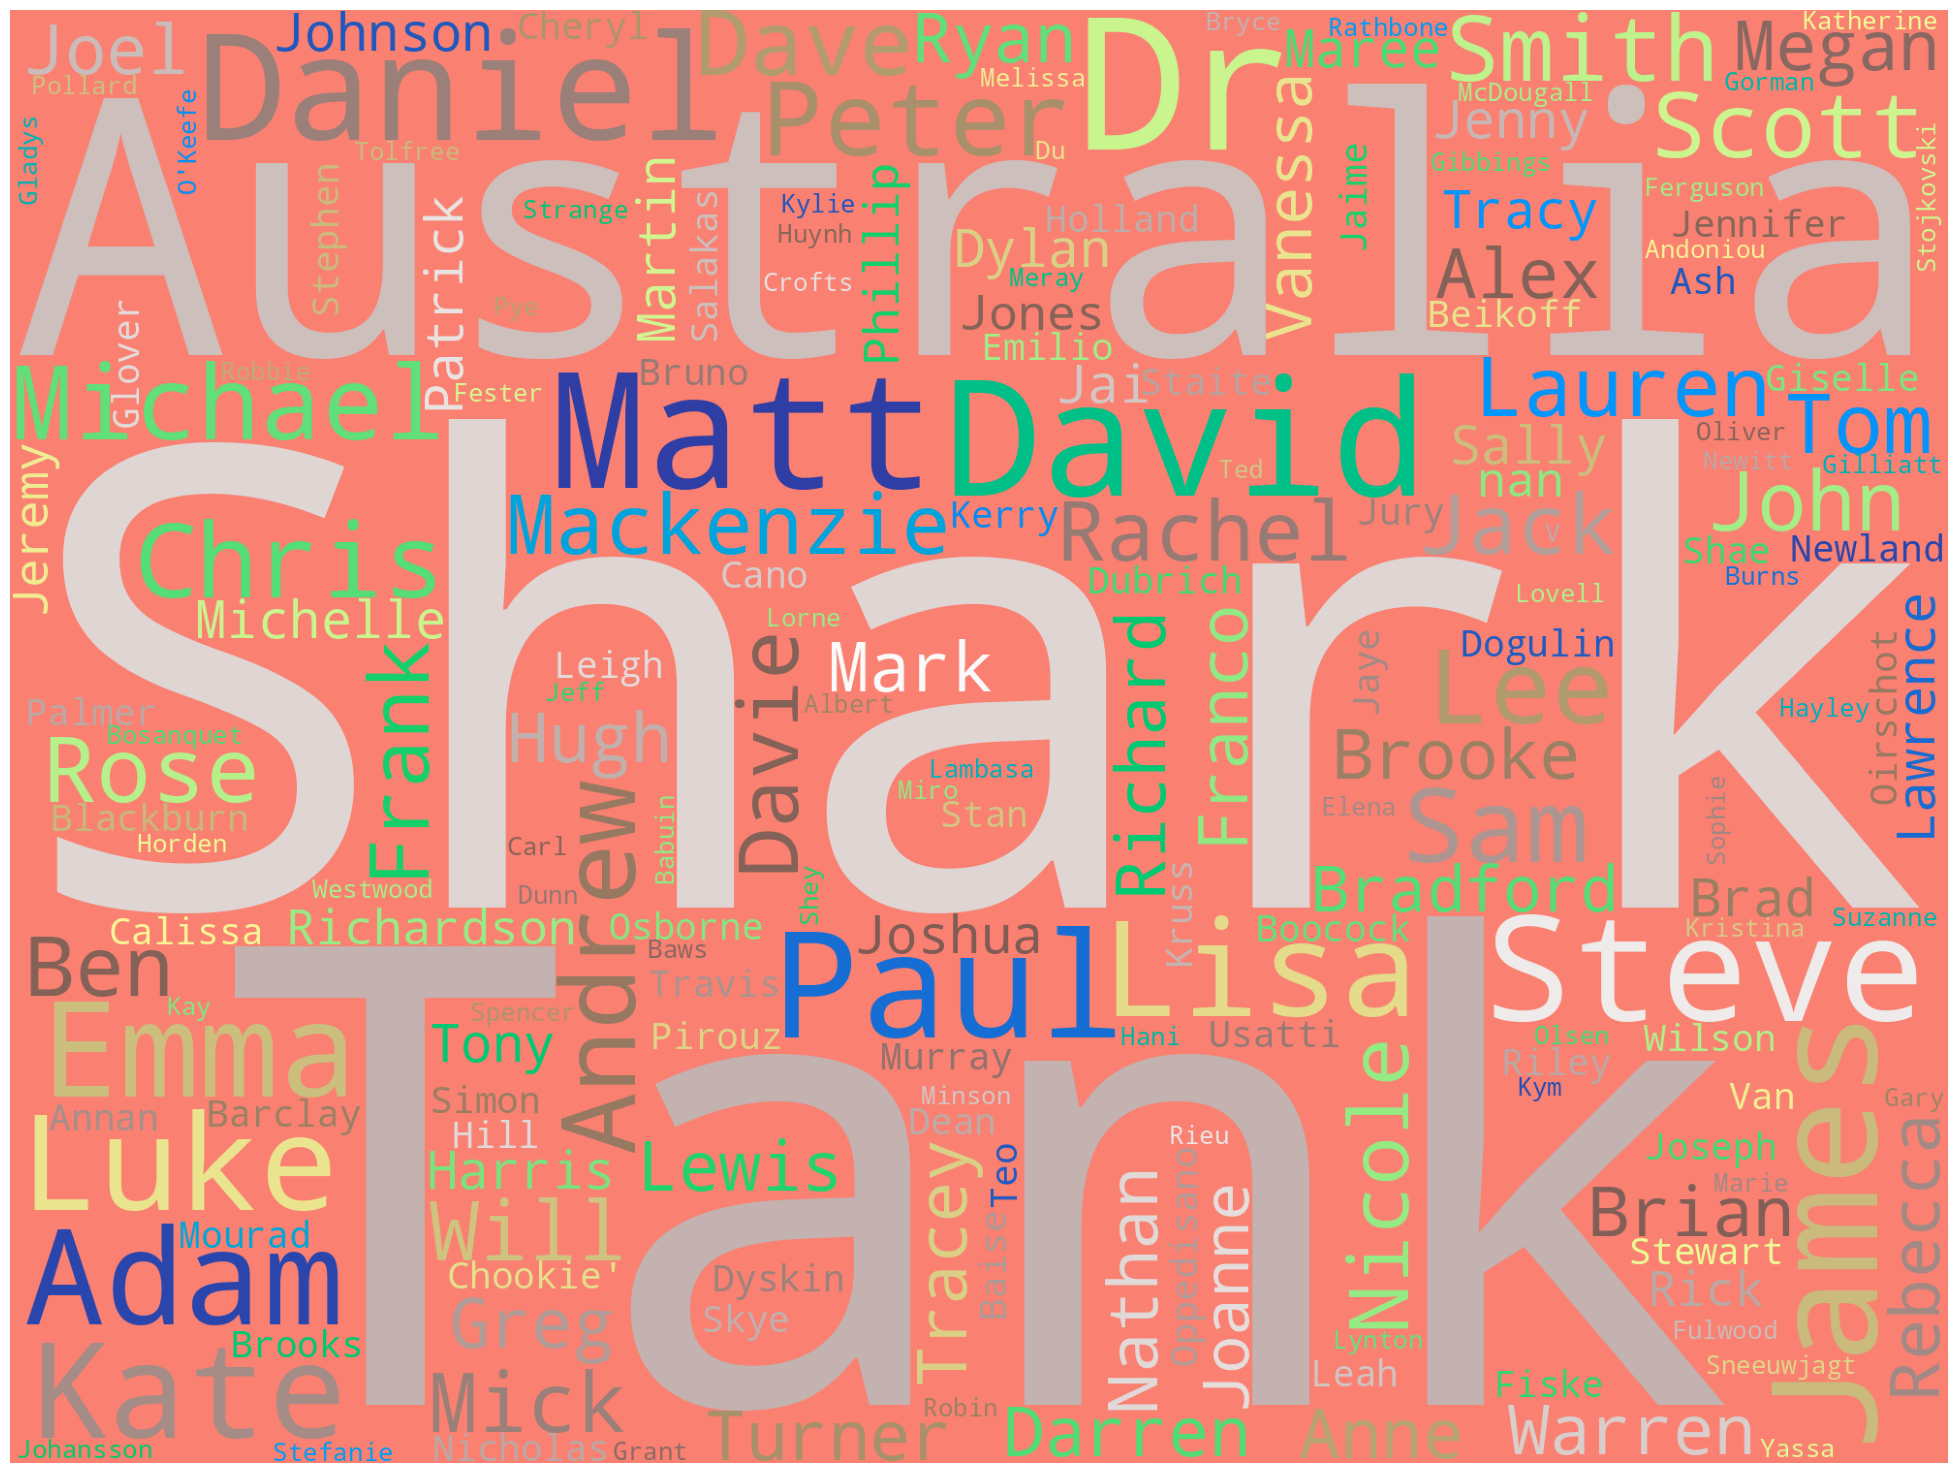

In [80]:
# Word cloud based on Pitcher name
text = " Shark Tank Australia ".join(cat for cat in shark_tank['Entrepreneur Names'].astype(str))
stop_words = list(STOPWORDS)
wordcloud = WordCloud(width=2000, height=1500, stopwords=stop_words, background_color='salmon', colormap='terrain_r', collocations=False, random_state=2025).generate(text)
plt.figure(figsize=(25,20))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [81]:
# Many (25) companies got more amount than they asked/expected
print(shark_tank.loc[shark_tank['Original Ask Amount'] < shark_tank["Total Deal Amount"]][["Startup Name"]].count())
shark_tank.loc[shark_tank['Original Ask Amount'] < shark_tank["Total Deal Amount"]][["Season Number","Startup Name","Original Ask Amount","Total Deal Amount"]]

Startup Name    25
dtype: int64


Season Number             Startup Name  Original Ask Amount  \
2                1               CASEBOARDS              20000.0   
3                1                   Hamdog                  1.0   
18               1                 Ranchero              60000.0   
24               1           ScrubbaWashBag             178000.0   
27               1               Bottlepops              95000.0   
38               1          TheDinnerLadies             140000.0   
46               1                 FlyBabee              50000.0   
47               1                  THREE65              60000.0   
59               1              sonseeWoman              50000.0   
63               2            OnTheGoSports             300000.0   
80               2        BodyPeaceClothing              90000.0   
110              2             LilFairyDoor             325000.0   
112              2               TORQUESAFE             300000.0   
121              3         HooHaaHeadphones                 20.0   
127              3              MiniPallets             200000.0   
163              3             FreshMeals2U             150000.0   
168              4  TheInappropriateGiftCo.             100000.0   
180              4              ISRTraining             125000.0   
199              4            TheMasonBaker              50000.0   
216              5         BoringWithoutYou              36000.0   
222              5               GlossyBoys              25000.0   
223              5                 FireHalo             100000.0   
235              5              ContourCube             250000.0   
240              5               Brandscent             150000.0   
276              6             MimiHaircare             250000.0   

     Total Deal Amount  
2              40000.0  
3                  2.0  
18             80000.0  
24            360000.0  
27            150000.0  
38            216000.0  
46             80000.0  
47            120000.0  
59            100000.0  
63            600000.0  
80            180000.0  
110           650000.0  
112           500000.0  
121               30.0  
127           400000.0  
163           200000.0  
168           250000.0  
180           187000.0  
199           100000.0  
216            50000.0  
222            75000.0  
223           150000.0  
235           375000.0  
240           175000.0  
276           350000.0

In [82]:
# Most of the companies diluted/gave their company equity more than they initially offered/expected
shark_tank.loc[shark_tank['Original Offered Equity'] < shark_tank["Total Deal Equity"]][["Season Number","Startup Name","Original Offered Equity","Total Deal Equity"]]

Season Number   Startup Name  Original Offered Equity  Total Deal Equity
2                1     CASEBOARDS                     10.0               35.0
3                1         Hamdog                     25.0               50.0
4                1  EdibleBugShop                     20.0               50.0
6                1    ThroatScope                     10.0               30.0
18               1       Ranchero                     30.0               40.0
..             ...            ...                      ...                ...
271              6          TernX                     10.0               30.0
275              6     AudimaLabs                      5.0               15.0
276              6   MimiHaircare                     10.0               30.0
277              6          Ramla                     10.0               30.0
278              6     SWIFFSpray                     10.0               25.0

[128 rows x 4 columns]

In [83]:
# Below (26) companies got the same valuation they requested (with or without loan)
print(shark_tank.loc[shark_tank['Valuation Requested'] == shark_tank["Deal Valuation"]][["Startup Name"]].count())
shark_tank.loc[shark_tank['Valuation Requested'] == shark_tank["Deal Valuation"]][["Season Number","Startup Name","Valuation Requested","Deal Valuation"]]

Startup Name    26
dtype: int64


Season Number             Startup Name  Valuation Requested  \
0                1            CricketCooler            1400000.0   
3                1                   Hamdog                  4.0   
11               1           MobileTyreShop            2500000.0   
18               1                 Ranchero             200000.0   
55               1       HaloMedicalDevices             952381.0   
65               2           SharknadoAlive             950000.0   
67               2              CarNextDoor            7500000.0   
74               2                Rhinohide             800000.0   
80               2        BodyPeaceClothing             600000.0   
81               2              FridayBeers             250000.0   
104              2               SofiSpritz            1300000.0   
114              3                CancerAid            5000000.0   
121              3         HooHaaHeadphones                100.0   
127              3              MiniPallets            1000000.0   
160              3                  OneTalk             250000.0   
168              4  TheInappropriateGiftCo.            1000000.0   
171              4              StandInBaby            1000000.0   
181              4                     Subo            1000000.0   
185              4         GanacheChocolate            1500000.0   
194              4              BareAndBoho             283333.0   
199              4            TheMasonBaker             333333.0   
215              4                     QPay            4523810.0   
244              6               ClutchGlue            2000000.0   
247              6                     Muse            1000000.0   
266              6                TasteBubs             625000.0   
272              6                   Guarda            8333333.0   

     Deal Valuation  
0         1400000.0  
3               4.0  
11        2500000.0  
18         200000.0  
55         952381.0  
65         950000.0  
67        7500000.0  
74         800000.0  
80         600000.0  
81         250000.0  
104       1300000.0  
114       5000000.0  
121           100.0  
127       1000000.0  
160        250000.0  
168       1000000.0  
171       1000000.0  
181       1000000.0  
185       1500000.0  
194        283333.0  
199        333333.0  
215       4523810.0  
244       2000000.0  
247       1000000.0  
266        625000.0  
272       8333333.0

In [84]:
# There are 6 companies which got more valuation than they pitched
print(shark_tank.loc[shark_tank['Valuation Requested'] < shark_tank["Deal Valuation"]][["Startup Name"]].count())
shark_tank.loc[shark_tank['Valuation Requested'] < shark_tank["Deal Valuation"]][["Season Number","Startup Name","Valuation Requested","Deal Valuation"]]

Startup Name    6
dtype: int64


Season Number      Startup Name  Valuation Requested  Deal Valuation
38               1   TheDinnerLadies             424242.0        654545.0
59               1       sonseeWoman             250000.0        500000.0
77               2              2Shu             375000.0        600000.0
82               2            CapHat             480000.0       1200000.0
110              2      LilFairyDoor            1625000.0       3250000.0
216              5  BoringWithoutYou             180000.0        250000.0

In [85]:
# Episodes which got most Viewership
print("Maximum SharkTank viewership in AU:", shark_tank['Viewers'].max(), "\n")
print(shark_tank.loc[shark_tank['Viewers']>=shark_tank['Viewers'].max()-240000][["Season Number","Episode Number","Startup Name","Viewers"]].head(12).sort_values("Viewers",ascending=False).to_string(index=False))

Maximum SharkTank viewership in AU: 973000.0 

 Season Number  Episode Number           Startup Name  Viewers
             1               6         ScrubbaWashBag 973000.0
             1               6                  KLite 973000.0
             1               6               EvilCorp 973000.0
             1               6             Bottlepops 973000.0
             3               1              CancerAid 749000.0
             3               1             MiniClones 749000.0
             3               1               iRecruit 749000.0
             1               3               Surfsafe 739000.0
             1               3          CaptainActive 739000.0
             1               3         MobileTyreShop 739000.0
             1               3 SimplyMoreishMarinades 739000.0
             1               3                TouchCo 739000.0


In [86]:
# Episodes which got least Viewership
print("Minimum SharkTank viewership in AU:", shark_tank['Viewers'].min(), "\n")
print(shark_tank.loc[shark_tank['Viewers']<=shark_tank['Viewers'].min()+15000][["Season Number","Episode Number","Startup Name","Viewers"]].head(12).sort_values("Viewers").to_string(index=False))

Minimum SharkTank viewership in AU: 216000.0 

 Season Number  Episode Number            Startup Name  Viewers
             5               5               MimiAndCo 216000.0
             5               5            WuliGrooming 216000.0
             5               5                  Mearth 216000.0
             5               4               AIToolkit 223000.0
             5               4                 Kaasida 223000.0
             5               4              TheBeanies 223000.0
             5               7                  35MMCo 227000.0
             5               7        SockDrawerHeroes 227000.0
             5               7 HolidayCelebrationTrees 227000.0
             5               7                 Vanable 227000.0


Multiple Entrepreneurs
0    164
1    114
Name: count, dtype: Int64 

Multiple Entrepreneurs
0    59%
1    41%
Name: proportion, dtype: object


<Axes: ylabel='count'>

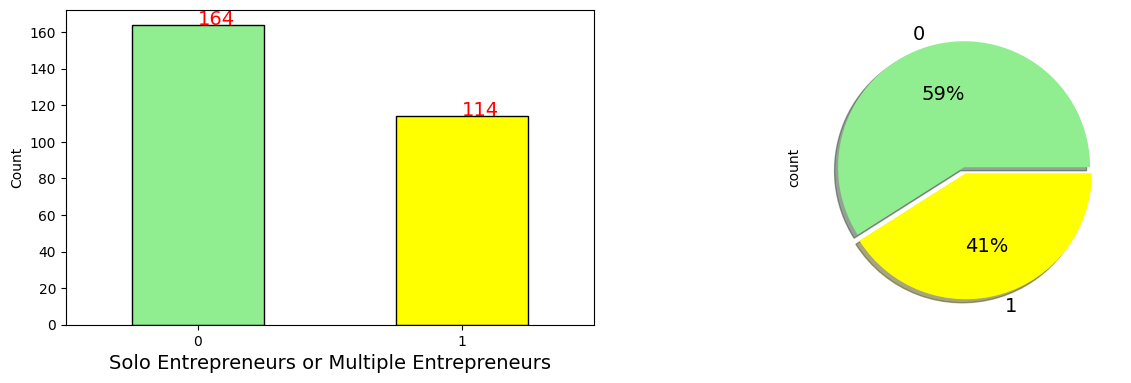

In [87]:
# Solo or multiple Entrepreneurs ?
print(shark_tank['Multiple Entrepreneurs'].value_counts(), "\n")
print(round(shark_tank['Multiple Entrepreneurs'].value_counts(normalize=True)*100).astype(str).str.replace('.0', '%', regex=False))

plt.figure(figsize = (15,9))
ax1 = plt.subplot(221)
shark_tank["Multiple Entrepreneurs"].value_counts().plot(kind='bar', color=["lightgreen","yellow"], ec="k")
plt.xlabel("Solo Entrepreneurs or Multiple Entrepreneurs", size=14)
plt.ylabel("Count")
plt.xticks(rotation=0)
for x,y in enumerate(shark_tank["Multiple Entrepreneurs"].value_counts()):
    plt.annotate(y, (x,y), fontsize=14, color="red")
    
ax2 = plt.subplot(222)
shark_tank["Multiple Entrepreneurs"].value_counts().plot(kind='pie', autopct='%.0f%%', explode = (0,0.05), colors=["lightgreen","yellow"], shadow=True, fontsize=14)

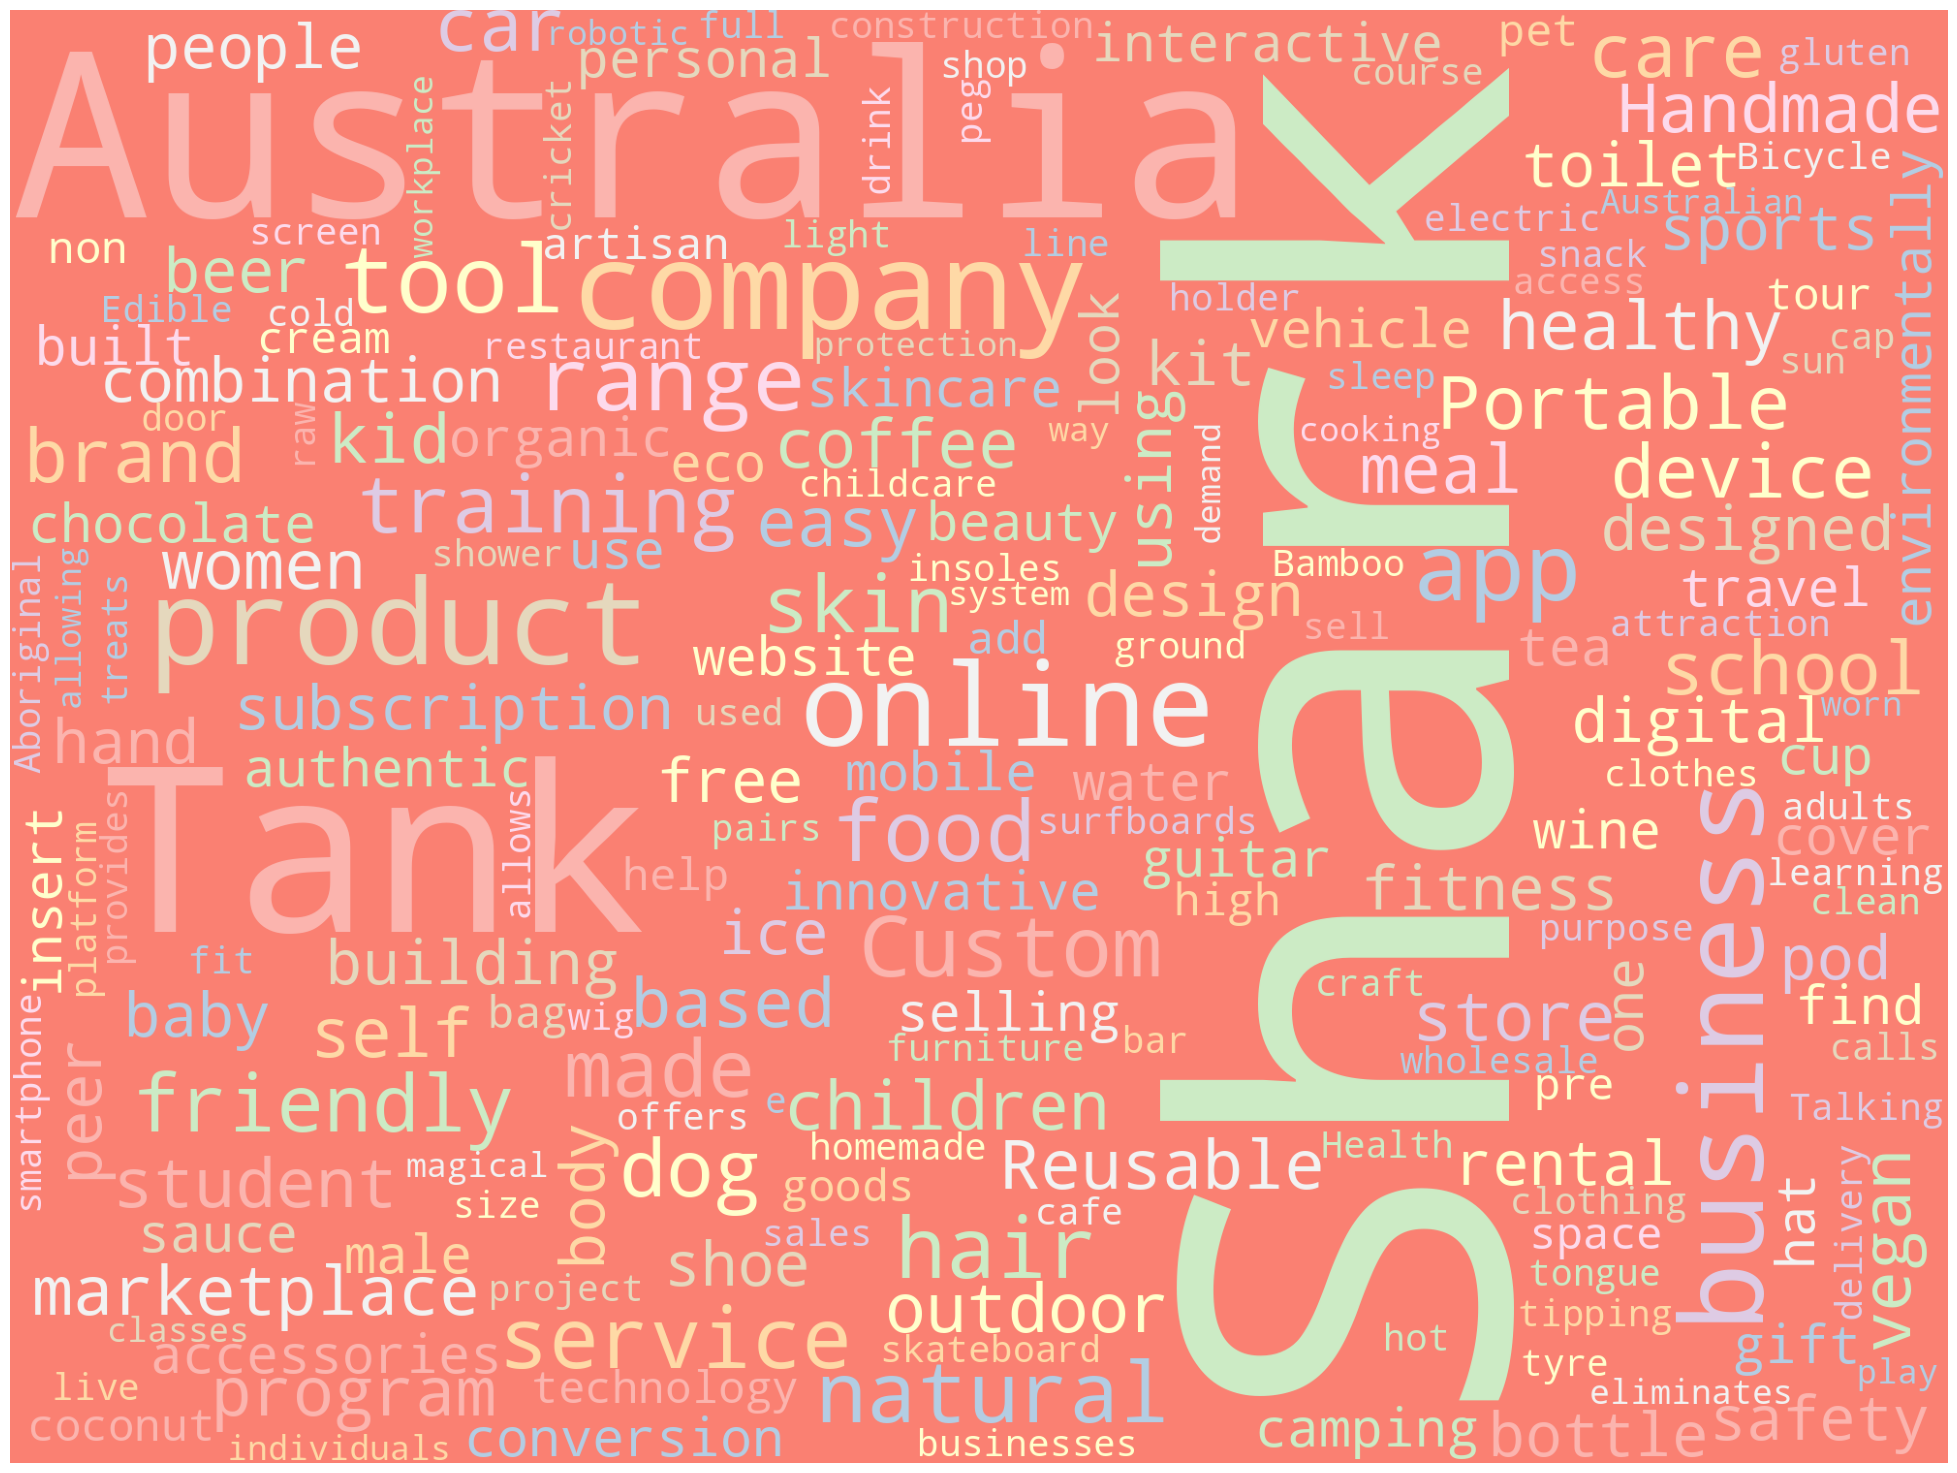

In [88]:
# Word cloud based on Business Description of startups came in all seasons
text = " Shark Tank Australia ".join(cat for cat in shark_tank.loc[shark_tank['Business Description'].notnull()]['Business Description'])
stop_words = list(STOPWORDS)
wordcloud = WordCloud(width=2000, height=1500, stopwords=stop_words, background_color='salmon', colormap='Pastel1', collocations=False, random_state=2025).generate(text)
plt.figure(figsize=(25,20))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [89]:
# Correlation matrix
shark_tank.corr(numeric_only=True).style.background_gradient(cmap = 'Blues')

In [90]:
print("numpy version: {}". format(np.__version__))
print("pandas version: {}". format(pd.__version__))
import matplotlib
print("matplotlib version: {}". format(matplotlib. __version__))
print("seaborn version: {}". format(sns.__version__))
import plotly
print("plotly version: {}". format(plotly.__version__))

# Current Python package versions
# numpy version: 1.26.4
# pandas version: 2.2.3
# matplotlib version: 3.7.2
# seaborn version: 0.12.2
# plotly version: 5.24.1

numpy version: 1.26.4
pandas version: 2.2.3
matplotlib version: 3.7.2
seaborn version: 0.12.2
plotly version: 5.24.1


## Data set values verification (you can ignore below section)
##### below queries should not return any rows

In [91]:
shark_tank.loc[(shark_tank['Accepted Offer'] == 1) & (shark_tank['Total Deal Amount'].isnull())]

Empty DataFrame
Columns: [Season Number, Startup Name, Episode Number, Pitch Number, Season Start, Season End, Original Air Date, Industry, Business Description, Company Website, Pitchers Gender, Pitchers Average Age, Pitchers City, Pitchers State, Entrepreneur Names, Multiple Entrepreneurs, Viewers, Original Ask Amount, Original Offered Equity, Valuation Requested, Received Offer, Accepted Offer, Total Deal Amount, Total Deal Equity, Deal Valuation, Number of Sharks in Deal, Investment Amount Per Shark, Equity Per Shark, Royalty Deal, Advisory Shares Equity, Loan, Deal Has Conditions, Mentorship, Steve Investment Amount, Steve Investment Equity, Janine Investment Amount, Janine Investment Equity, Andrew Investment Amount, Andrew Investment Equity, Naomi Investment Amount, Naomi Investment Equity, Glen Investment Amount, Glen Investment Equity, Guest Investment Amount, Guest Investment Equity, Invested Guest Name, Steve Present, Janine Present, Andrew Present, Naomi Present, Glen Present, Guest Present, Total Deal Amount in Millions]
Index: []

[0 rows x 53 columns]

In [92]:
shark_tank.loc[(shark_tank['Accepted Offer'] == 1) & (shark_tank['Total Deal Equity'].isnull())]

Empty DataFrame
Columns: [Season Number, Startup Name, Episode Number, Pitch Number, Season Start, Season End, Original Air Date, Industry, Business Description, Company Website, Pitchers Gender, Pitchers Average Age, Pitchers City, Pitchers State, Entrepreneur Names, Multiple Entrepreneurs, Viewers, Original Ask Amount, Original Offered Equity, Valuation Requested, Received Offer, Accepted Offer, Total Deal Amount, Total Deal Equity, Deal Valuation, Number of Sharks in Deal, Investment Amount Per Shark, Equity Per Shark, Royalty Deal, Advisory Shares Equity, Loan, Deal Has Conditions, Mentorship, Steve Investment Amount, Steve Investment Equity, Janine Investment Amount, Janine Investment Equity, Andrew Investment Amount, Andrew Investment Equity, Naomi Investment Amount, Naomi Investment Equity, Glen Investment Amount, Glen Investment Equity, Guest Investment Amount, Guest Investment Equity, Invested Guest Name, Steve Present, Janine Present, Andrew Present, Naomi Present, Glen Present, Guest Present, Total Deal Amount in Millions]
Index: []

[0 rows x 53 columns]

In [93]:
shark_tank.loc[(shark_tank['Accepted Offer'] == 1) & (shark_tank['Deal Valuation'].isnull())]

Empty DataFrame
Columns: [Season Number, Startup Name, Episode Number, Pitch Number, Season Start, Season End, Original Air Date, Industry, Business Description, Company Website, Pitchers Gender, Pitchers Average Age, Pitchers City, Pitchers State, Entrepreneur Names, Multiple Entrepreneurs, Viewers, Original Ask Amount, Original Offered Equity, Valuation Requested, Received Offer, Accepted Offer, Total Deal Amount, Total Deal Equity, Deal Valuation, Number of Sharks in Deal, Investment Amount Per Shark, Equity Per Shark, Royalty Deal, Advisory Shares Equity, Loan, Deal Has Conditions, Mentorship, Steve Investment Amount, Steve Investment Equity, Janine Investment Amount, Janine Investment Equity, Andrew Investment Amount, Andrew Investment Equity, Naomi Investment Amount, Naomi Investment Equity, Glen Investment Amount, Glen Investment Equity, Guest Investment Amount, Guest Investment Equity, Invested Guest Name, Steve Present, Janine Present, Andrew Present, Naomi Present, Glen Present, Guest Present, Total Deal Amount in Millions]
Index: []

[0 rows x 53 columns]

In [94]:
shark_tank.loc[(shark_tank['Accepted Offer'] == 1) & (shark_tank['Number of Sharks in Deal'].isnull())]

Empty DataFrame
Columns: [Season Number, Startup Name, Episode Number, Pitch Number, Season Start, Season End, Original Air Date, Industry, Business Description, Company Website, Pitchers Gender, Pitchers Average Age, Pitchers City, Pitchers State, Entrepreneur Names, Multiple Entrepreneurs, Viewers, Original Ask Amount, Original Offered Equity, Valuation Requested, Received Offer, Accepted Offer, Total Deal Amount, Total Deal Equity, Deal Valuation, Number of Sharks in Deal, Investment Amount Per Shark, Equity Per Shark, Royalty Deal, Advisory Shares Equity, Loan, Deal Has Conditions, Mentorship, Steve Investment Amount, Steve Investment Equity, Janine Investment Amount, Janine Investment Equity, Andrew Investment Amount, Andrew Investment Equity, Naomi Investment Amount, Naomi Investment Equity, Glen Investment Amount, Glen Investment Equity, Guest Investment Amount, Guest Investment Equity, Invested Guest Name, Steve Present, Janine Present, Andrew Present, Naomi Present, Glen Present, Guest Present, Total Deal Amount in Millions]
Index: []

[0 rows x 53 columns]

In [95]:
shark_tank.loc[(shark_tank['Accepted Offer'] == 1) & (shark_tank['Investment Amount Per Shark'].isnull())]

Empty DataFrame
Columns: [Season Number, Startup Name, Episode Number, Pitch Number, Season Start, Season End, Original Air Date, Industry, Business Description, Company Website, Pitchers Gender, Pitchers Average Age, Pitchers City, Pitchers State, Entrepreneur Names, Multiple Entrepreneurs, Viewers, Original Ask Amount, Original Offered Equity, Valuation Requested, Received Offer, Accepted Offer, Total Deal Amount, Total Deal Equity, Deal Valuation, Number of Sharks in Deal, Investment Amount Per Shark, Equity Per Shark, Royalty Deal, Advisory Shares Equity, Loan, Deal Has Conditions, Mentorship, Steve Investment Amount, Steve Investment Equity, Janine Investment Amount, Janine Investment Equity, Andrew Investment Amount, Andrew Investment Equity, Naomi Investment Amount, Naomi Investment Equity, Glen Investment Amount, Glen Investment Equity, Guest Investment Amount, Guest Investment Equity, Invested Guest Name, Steve Present, Janine Present, Andrew Present, Naomi Present, Glen Present, Guest Present, Total Deal Amount in Millions]
Index: []

[0 rows x 53 columns]

In [96]:
shark_tank.loc[(shark_tank['Accepted Offer'] == 1) & (shark_tank['Equity Per Shark'].isnull())]

Empty DataFrame
Columns: [Season Number, Startup Name, Episode Number, Pitch Number, Season Start, Season End, Original Air Date, Industry, Business Description, Company Website, Pitchers Gender, Pitchers Average Age, Pitchers City, Pitchers State, Entrepreneur Names, Multiple Entrepreneurs, Viewers, Original Ask Amount, Original Offered Equity, Valuation Requested, Received Offer, Accepted Offer, Total Deal Amount, Total Deal Equity, Deal Valuation, Number of Sharks in Deal, Investment Amount Per Shark, Equity Per Shark, Royalty Deal, Advisory Shares Equity, Loan, Deal Has Conditions, Mentorship, Steve Investment Amount, Steve Investment Equity, Janine Investment Amount, Janine Investment Equity, Andrew Investment Amount, Andrew Investment Equity, Naomi Investment Amount, Naomi Investment Equity, Glen Investment Amount, Glen Investment Equity, Guest Investment Amount, Guest Investment Equity, Invested Guest Name, Steve Present, Janine Present, Andrew Present, Naomi Present, Glen Present, Guest Present, Total Deal Amount in Millions]
Index: []

[0 rows x 53 columns]

In [97]:
shark_tank.loc[round(shark_tank['Total Deal Amount'].fillna(0),1) != round(shark_tank['Steve Investment Amount'].fillna(0) + shark_tank['Janine Investment Amount'].fillna(0) + shark_tank['Andrew Investment Amount'].fillna(0) + shark_tank['Naomi Investment Amount'].fillna(0) + shark_tank['Glen Investment Amount'].fillna(0) + shark_tank['Guest Investment Amount'].fillna(0), 1)]

Empty DataFrame
Columns: [Season Number, Startup Name, Episode Number, Pitch Number, Season Start, Season End, Original Air Date, Industry, Business Description, Company Website, Pitchers Gender, Pitchers Average Age, Pitchers City, Pitchers State, Entrepreneur Names, Multiple Entrepreneurs, Viewers, Original Ask Amount, Original Offered Equity, Valuation Requested, Received Offer, Accepted Offer, Total Deal Amount, Total Deal Equity, Deal Valuation, Number of Sharks in Deal, Investment Amount Per Shark, Equity Per Shark, Royalty Deal, Advisory Shares Equity, Loan, Deal Has Conditions, Mentorship, Steve Investment Amount, Steve Investment Equity, Janine Investment Amount, Janine Investment Equity, Andrew Investment Amount, Andrew Investment Equity, Naomi Investment Amount, Naomi Investment Equity, Glen Investment Amount, Glen Investment Equity, Guest Investment Amount, Guest Investment Equity, Invested Guest Name, Steve Present, Janine Present, Andrew Present, Naomi Present, Glen Present, Guest Present, Total Deal Amount in Millions]
Index: []

[0 rows x 53 columns]

In [98]:
shark_tank.loc[round(shark_tank['Total Deal Equity'].fillna(0),1) != round(shark_tank['Steve Investment Equity'].fillna(0) + shark_tank['Janine Investment Equity'].fillna(0) + shark_tank['Andrew Investment Equity'].fillna(0) + shark_tank['Naomi Investment Equity'].fillna(0) + shark_tank['Glen Investment Equity'].fillna(0) + shark_tank['Guest Investment Equity'].fillna(0), 1)]

Empty DataFrame
Columns: [Season Number, Startup Name, Episode Number, Pitch Number, Season Start, Season End, Original Air Date, Industry, Business Description, Company Website, Pitchers Gender, Pitchers Average Age, Pitchers City, Pitchers State, Entrepreneur Names, Multiple Entrepreneurs, Viewers, Original Ask Amount, Original Offered Equity, Valuation Requested, Received Offer, Accepted Offer, Total Deal Amount, Total Deal Equity, Deal Valuation, Number of Sharks in Deal, Investment Amount Per Shark, Equity Per Shark, Royalty Deal, Advisory Shares Equity, Loan, Deal Has Conditions, Mentorship, Steve Investment Amount, Steve Investment Equity, Janine Investment Amount, Janine Investment Equity, Andrew Investment Amount, Andrew Investment Equity, Naomi Investment Amount, Naomi Investment Equity, Glen Investment Amount, Glen Investment Equity, Guest Investment Amount, Guest Investment Equity, Invested Guest Name, Steve Present, Janine Present, Andrew Present, Naomi Present, Glen Present, Guest Present, Total Deal Amount in Millions]
Index: []

[0 rows x 53 columns]

In [99]:
shark_tank.loc[(shark_tank['Guest Investment Amount'].notnull()) & (shark_tank['Invested Guest Name'].isnull())]

Empty DataFrame
Columns: [Season Number, Startup Name, Episode Number, Pitch Number, Season Start, Season End, Original Air Date, Industry, Business Description, Company Website, Pitchers Gender, Pitchers Average Age, Pitchers City, Pitchers State, Entrepreneur Names, Multiple Entrepreneurs, Viewers, Original Ask Amount, Original Offered Equity, Valuation Requested, Received Offer, Accepted Offer, Total Deal Amount, Total Deal Equity, Deal Valuation, Number of Sharks in Deal, Investment Amount Per Shark, Equity Per Shark, Royalty Deal, Advisory Shares Equity, Loan, Deal Has Conditions, Mentorship, Steve Investment Amount, Steve Investment Equity, Janine Investment Amount, Janine Investment Equity, Andrew Investment Amount, Andrew Investment Equity, Naomi Investment Amount, Naomi Investment Equity, Glen Investment Amount, Glen Investment Equity, Guest Investment Amount, Guest Investment Equity, Invested Guest Name, Steve Present, Janine Present, Andrew Present, Naomi Present, Glen Present, Guest Present, Total Deal Amount in Millions]
Index: []

[0 rows x 53 columns]

In [100]:
shark_tank.loc[(shark_tank['Guest Investment Amount'].isnull()) & (shark_tank['Invested Guest Name'].notnull())]

Empty DataFrame
Columns: [Season Number, Startup Name, Episode Number, Pitch Number, Season Start, Season End, Original Air Date, Industry, Business Description, Company Website, Pitchers Gender, Pitchers Average Age, Pitchers City, Pitchers State, Entrepreneur Names, Multiple Entrepreneurs, Viewers, Original Ask Amount, Original Offered Equity, Valuation Requested, Received Offer, Accepted Offer, Total Deal Amount, Total Deal Equity, Deal Valuation, Number of Sharks in Deal, Investment Amount Per Shark, Equity Per Shark, Royalty Deal, Advisory Shares Equity, Loan, Deal Has Conditions, Mentorship, Steve Investment Amount, Steve Investment Equity, Janine Investment Amount, Janine Investment Equity, Andrew Investment Amount, Andrew Investment Equity, Naomi Investment Amount, Naomi Investment Equity, Glen Investment Amount, Glen Investment Equity, Guest Investment Amount, Guest Investment Equity, Invested Guest Name, Steve Present, Janine Present, Andrew Present, Naomi Present, Glen Present, Guest Present, Total Deal Amount in Millions]
Index: []

[0 rows x 53 columns]

In [101]:
shark_tank.loc[(shark_tank['Multiple Entrepreneurs'] != 0) & (shark_tank['Multiple Entrepreneurs'] != 1)]

Empty DataFrame
Columns: [Season Number, Startup Name, Episode Number, Pitch Number, Season Start, Season End, Original Air Date, Industry, Business Description, Company Website, Pitchers Gender, Pitchers Average Age, Pitchers City, Pitchers State, Entrepreneur Names, Multiple Entrepreneurs, Viewers, Original Ask Amount, Original Offered Equity, Valuation Requested, Received Offer, Accepted Offer, Total Deal Amount, Total Deal Equity, Deal Valuation, Number of Sharks in Deal, Investment Amount Per Shark, Equity Per Shark, Royalty Deal, Advisory Shares Equity, Loan, Deal Has Conditions, Mentorship, Steve Investment Amount, Steve Investment Equity, Janine Investment Amount, Janine Investment Equity, Andrew Investment Amount, Andrew Investment Equity, Naomi Investment Amount, Naomi Investment Equity, Glen Investment Amount, Glen Investment Equity, Guest Investment Amount, Guest Investment Equity, Invested Guest Name, Steve Present, Janine Present, Andrew Present, Naomi Present, Glen Present, Guest Present, Total Deal Amount in Millions]
Index: []

[0 rows x 53 columns]

In [102]:
shark_tank.loc[(shark_tank['Multiple Entrepreneurs'] == 0) & (shark_tank['Entrepreneur Names'].notnull() & shark_tank['Entrepreneur Names'].str.contains(' and'))]

Empty DataFrame
Columns: [Season Number, Startup Name, Episode Number, Pitch Number, Season Start, Season End, Original Air Date, Industry, Business Description, Company Website, Pitchers Gender, Pitchers Average Age, Pitchers City, Pitchers State, Entrepreneur Names, Multiple Entrepreneurs, Viewers, Original Ask Amount, Original Offered Equity, Valuation Requested, Received Offer, Accepted Offer, Total Deal Amount, Total Deal Equity, Deal Valuation, Number of Sharks in Deal, Investment Amount Per Shark, Equity Per Shark, Royalty Deal, Advisory Shares Equity, Loan, Deal Has Conditions, Mentorship, Steve Investment Amount, Steve Investment Equity, Janine Investment Amount, Janine Investment Equity, Andrew Investment Amount, Andrew Investment Equity, Naomi Investment Amount, Naomi Investment Equity, Glen Investment Amount, Glen Investment Equity, Guest Investment Amount, Guest Investment Equity, Invested Guest Name, Steve Present, Janine Present, Andrew Present, Naomi Present, Glen Present, Guest Present, Total Deal Amount in Millions]
Index: []

[0 rows x 53 columns]

In [103]:
shark_tank.loc[(shark_tank['Multiple Entrepreneurs'] == 1) & (shark_tank['Entrepreneur Names'].str.contains(' & ')==False | shark_tank['Entrepreneur Names'].str.contains(' and'))]

Empty DataFrame
Columns: [Season Number, Startup Name, Episode Number, Pitch Number, Season Start, Season End, Original Air Date, Industry, Business Description, Company Website, Pitchers Gender, Pitchers Average Age, Pitchers City, Pitchers State, Entrepreneur Names, Multiple Entrepreneurs, Viewers, Original Ask Amount, Original Offered Equity, Valuation Requested, Received Offer, Accepted Offer, Total Deal Amount, Total Deal Equity, Deal Valuation, Number of Sharks in Deal, Investment Amount Per Shark, Equity Per Shark, Royalty Deal, Advisory Shares Equity, Loan, Deal Has Conditions, Mentorship, Steve Investment Amount, Steve Investment Equity, Janine Investment Amount, Janine Investment Equity, Andrew Investment Amount, Andrew Investment Equity, Naomi Investment Amount, Naomi Investment Equity, Glen Investment Amount, Glen Investment Equity, Guest Investment Amount, Guest Investment Equity, Invested Guest Name, Steve Present, Janine Present, Andrew Present, Naomi Present, Glen Present, Guest Present, Total Deal Amount in Millions]
Index: []

[0 rows x 53 columns]

In [104]:
shark_tank.loc[(shark_tank['Accepted Offer'] == 0) & (shark_tank['Total Deal Amount'].notnull())]

Empty DataFrame
Columns: [Season Number, Startup Name, Episode Number, Pitch Number, Season Start, Season End, Original Air Date, Industry, Business Description, Company Website, Pitchers Gender, Pitchers Average Age, Pitchers City, Pitchers State, Entrepreneur Names, Multiple Entrepreneurs, Viewers, Original Ask Amount, Original Offered Equity, Valuation Requested, Received Offer, Accepted Offer, Total Deal Amount, Total Deal Equity, Deal Valuation, Number of Sharks in Deal, Investment Amount Per Shark, Equity Per Shark, Royalty Deal, Advisory Shares Equity, Loan, Deal Has Conditions, Mentorship, Steve Investment Amount, Steve Investment Equity, Janine Investment Amount, Janine Investment Equity, Andrew Investment Amount, Andrew Investment Equity, Naomi Investment Amount, Naomi Investment Equity, Glen Investment Amount, Glen Investment Equity, Guest Investment Amount, Guest Investment Equity, Invested Guest Name, Steve Present, Janine Present, Andrew Present, Naomi Present, Glen Present, Guest Present, Total Deal Amount in Millions]
Index: []

[0 rows x 53 columns]

In [105]:
shark_tank.loc[(shark_tank['Pitchers Gender'] == 'Mixed Team') & (shark_tank['Multiple Entrepreneurs'] != 1)]

Empty DataFrame
Columns: [Season Number, Startup Name, Episode Number, Pitch Number, Season Start, Season End, Original Air Date, Industry, Business Description, Company Website, Pitchers Gender, Pitchers Average Age, Pitchers City, Pitchers State, Entrepreneur Names, Multiple Entrepreneurs, Viewers, Original Ask Amount, Original Offered Equity, Valuation Requested, Received Offer, Accepted Offer, Total Deal Amount, Total Deal Equity, Deal Valuation, Number of Sharks in Deal, Investment Amount Per Shark, Equity Per Shark, Royalty Deal, Advisory Shares Equity, Loan, Deal Has Conditions, Mentorship, Steve Investment Amount, Steve Investment Equity, Janine Investment Amount, Janine Investment Equity, Andrew Investment Amount, Andrew Investment Equity, Naomi Investment Amount, Naomi Investment Equity, Glen Investment Amount, Glen Investment Equity, Guest Investment Amount, Guest Investment Equity, Invested Guest Name, Steve Present, Janine Present, Andrew Present, Naomi Present, Glen Present, Guest Present, Total Deal Amount in Millions]
Index: []

[0 rows x 53 columns]

In [106]:
shark_tank.loc[(shark_tank['Accepted Offer'] == 0) & (shark_tank['Invested Guest Name'].notnull())]

Empty DataFrame
Columns: [Season Number, Startup Name, Episode Number, Pitch Number, Season Start, Season End, Original Air Date, Industry, Business Description, Company Website, Pitchers Gender, Pitchers Average Age, Pitchers City, Pitchers State, Entrepreneur Names, Multiple Entrepreneurs, Viewers, Original Ask Amount, Original Offered Equity, Valuation Requested, Received Offer, Accepted Offer, Total Deal Amount, Total Deal Equity, Deal Valuation, Number of Sharks in Deal, Investment Amount Per Shark, Equity Per Shark, Royalty Deal, Advisory Shares Equity, Loan, Deal Has Conditions, Mentorship, Steve Investment Amount, Steve Investment Equity, Janine Investment Amount, Janine Investment Equity, Andrew Investment Amount, Andrew Investment Equity, Naomi Investment Amount, Naomi Investment Equity, Glen Investment Amount, Glen Investment Equity, Guest Investment Amount, Guest Investment Equity, Invested Guest Name, Steve Present, Janine Present, Andrew Present, Naomi Present, Glen Present, Guest Present, Total Deal Amount in Millions]
Index: []

[0 rows x 53 columns]

In [107]:
shark_tank.loc[shark_tank['Total Deal Amount'] < shark_tank["Loan"]]

Empty DataFrame
Columns: [Season Number, Startup Name, Episode Number, Pitch Number, Season Start, Season End, Original Air Date, Industry, Business Description, Company Website, Pitchers Gender, Pitchers Average Age, Pitchers City, Pitchers State, Entrepreneur Names, Multiple Entrepreneurs, Viewers, Original Ask Amount, Original Offered Equity, Valuation Requested, Received Offer, Accepted Offer, Total Deal Amount, Total Deal Equity, Deal Valuation, Number of Sharks in Deal, Investment Amount Per Shark, Equity Per Shark, Royalty Deal, Advisory Shares Equity, Loan, Deal Has Conditions, Mentorship, Steve Investment Amount, Steve Investment Equity, Janine Investment Amount, Janine Investment Equity, Andrew Investment Amount, Andrew Investment Equity, Naomi Investment Amount, Naomi Investment Equity, Glen Investment Amount, Glen Investment Equity, Guest Investment Amount, Guest Investment Equity, Invested Guest Name, Steve Present, Janine Present, Andrew Present, Naomi Present, Glen Present, Guest Present, Total Deal Amount in Millions]
Index: []

[0 rows x 53 columns]

In [108]:
shark_tank.loc[(shark_tank['Number of Sharks in Deal'].fillna(0).round(0).astype(int) != shark_tank['Steve Investment Amount'].notnull().astype("int") + shark_tank['Janine Investment Amount'].notnull().astype("int") + shark_tank['Andrew Investment Amount'].notnull().astype("int") + shark_tank['Naomi Investment Amount'].notnull().astype("int") + shark_tank['Glen Investment Amount'].notnull().astype("int") + shark_tank['Guest Investment Amount'].notnull().astype("int") ) & (shark_tank['Guest Present']<2) ]

Empty DataFrame
Columns: [Season Number, Startup Name, Episode Number, Pitch Number, Season Start, Season End, Original Air Date, Industry, Business Description, Company Website, Pitchers Gender, Pitchers Average Age, Pitchers City, Pitchers State, Entrepreneur Names, Multiple Entrepreneurs, Viewers, Original Ask Amount, Original Offered Equity, Valuation Requested, Received Offer, Accepted Offer, Total Deal Amount, Total Deal Equity, Deal Valuation, Number of Sharks in Deal, Investment Amount Per Shark, Equity Per Shark, Royalty Deal, Advisory Shares Equity, Loan, Deal Has Conditions, Mentorship, Steve Investment Amount, Steve Investment Equity, Janine Investment Amount, Janine Investment Equity, Andrew Investment Amount, Andrew Investment Equity, Naomi Investment Amount, Naomi Investment Equity, Glen Investment Amount, Glen Investment Equity, Guest Investment Amount, Guest Investment Equity, Invested Guest Name, Steve Present, Janine Present, Andrew Present, Naomi Present, Glen Present, Guest Present, Total Deal Amount in Millions]
Index: []

[0 rows x 53 columns]